In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/creditscoring/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
data.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
data.isnull().sum()/data.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
Credit_Score                

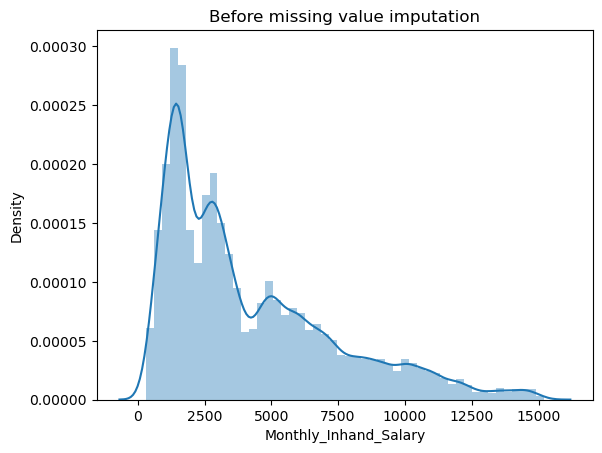

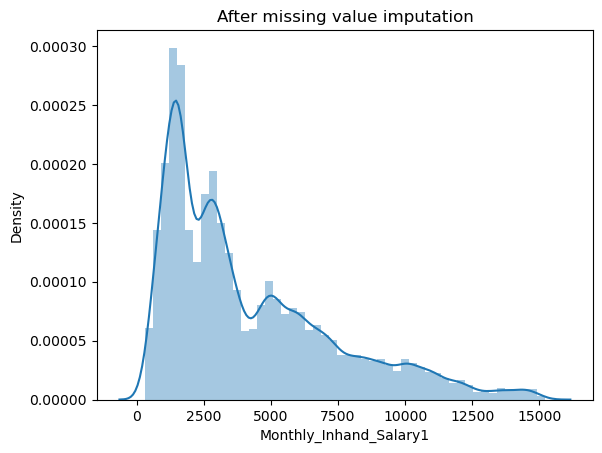

0

In [7]:
#Monnthly inhand salary
## forwardfill

data["Monthly_Inhand_Salary1"] = data["Monthly_Inhand_Salary"].fillna(method='ffill')
sns.distplot(data["Monthly_Inhand_Salary"])
plt.title("Before missing value imputation")
plt.show()
sns.distplot(data["Monthly_Inhand_Salary1"])
plt.title("After missing value imputation")
plt.show()
data["Monthly_Inhand_Salary1"].isnull().sum()


In [8]:
# Type of loan
data["Type_of_Loan"].value_counts().head(10)
# data["Type_of_Loan"].isnull().sum()
## Replacing with mode

data["Type_of_Loan"]=data["Type_of_Loan"].fillna(data["Type_of_Loan"].mode())

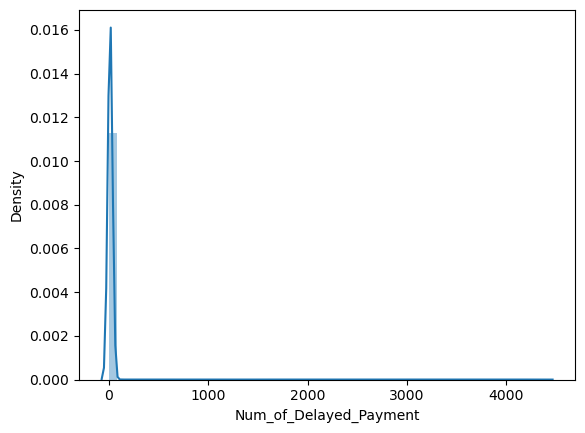

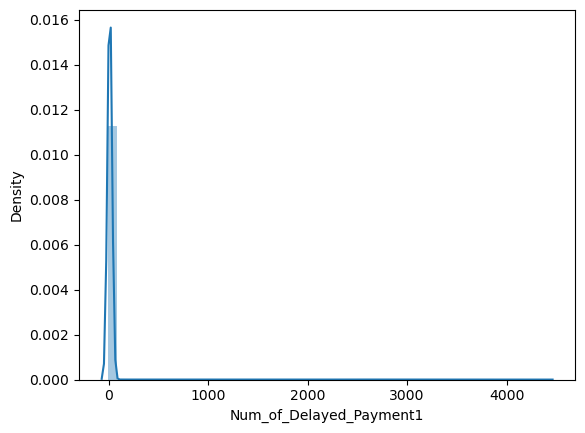

In [9]:
# Num_of_Delayed_Payment
data["Num_of_Delayed_Payment"].isna().sum()
data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].str.replace("_","")
sns.distplot(data["Num_of_Delayed_Payment"])
plt.show()
data["Num_of_Delayed_Payment1"]= data["Num_of_Delayed_Payment"].fillna(0)
sns.distplot(data["Num_of_Delayed_Payment1"])
plt.show()

In [10]:
data["Num_of_Delayed_Payment1"] = data["Num_of_Delayed_Payment1"].astype(int)

In [11]:
## Num_Credit_Inquiries
# very less data is null ; replacing with median/mode
data["Num_Credit_Inquiries"] = data["Num_Credit_Inquiries"].fillna(data["Num_Credit_Inquiries"].median())

In [12]:
# Credit_History_Age
(data["Credit_History_Age"].isna().sum())/data.shape[0]
data["Credit_History_Age"].value_counts()
data["Credit_History_Age"] = data["Credit_History_Age"].replace(np.nan,"No Credit History")


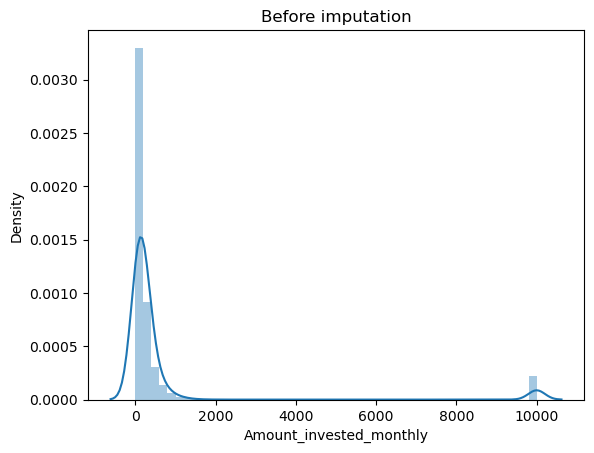

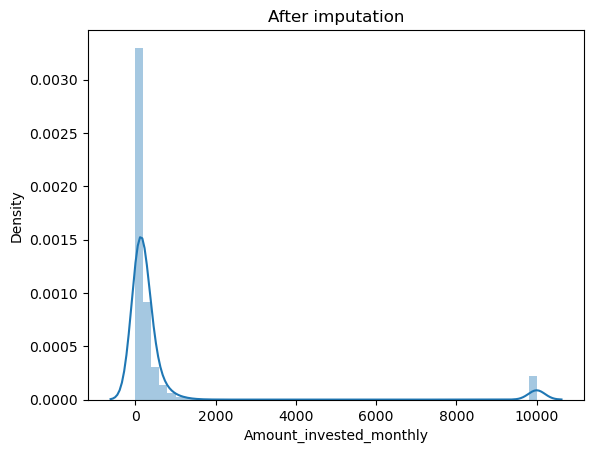

In [13]:
# Amount_invested_monthly
data["Amount_invested_monthly"] = data["Amount_invested_monthly"].str.replace("_","")
# (data["Amount_invested_monthly"].isna().sum())/data.shape[0]
sns.distplot(data["Amount_invested_monthly"])
plt.title("Before imputation")
plt.show()


# ## only 4% data is there; lets look into the data
# ## assuming the amount is not available / not applicable hence mark it as 0
data["Amount_invested_monthly1"] = data["Amount_invested_monthly"].replace(np.nan,0)
sns.distplot(data["Amount_invested_monthly"])
plt.title("After imputation")
plt.show()




In [14]:
# Monthly_Balance
print((data["Monthly_Balance"].isna().sum())/data.shape[0])
## only 1% data is there; lets look into the data
data[data["Monthly_Balance"].isna()]
## assuming the amount is not available / not applicable hence mark it as 0
data["Monthly_Balance"] = data["Monthly_Balance"].replace(np.nan,0)
print((data["Monthly_Balance"].isna().sum())/data.shape[0])


0.012
0.0


In [15]:
data.isnull().sum()/data.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.00000
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.00000
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.00000
Credit_Score                

# EDA and Outlier Treatment


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [17]:
obj=[]
num=[]
for i in data.columns:
    if data[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if data[i].dtype=="category":
        obj.append(i)
    if data[i].dtype =="float64":
        num.append(i)
    if data[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1'] 

Object columns:  ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Amount_invested_monthly1']


**Categorical Columns Analysis 
Some of these will be converted to numeric as data is not cleaned******

In [18]:
obj.remove("ID")
obj.remove("SSN")
obj.remove("Name")
obj.remove("Num_of_Delayed_Payment")
# obj.remove("Monthly_Inhand_Salary")

In [19]:
obj

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Amount_invested_monthly1']

In [20]:
def Outlier_treatment(m):
    # Outlier treatment
    q1 = np.percentile(data[m], 25)
    q3 = np.percentile(data[m], 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    outliers=[]
    for i in data[m]: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    print("Total Outliers : ", len(outliers))
    print("Lower bound : ", lwr_bound)
    print("Upper Bound : ", upr_bound)
    

In [21]:
# Lets look into columns which are actually numeric but comings as categorical
# 1. Annual Income
data["Annual_Income"].head(100)
data["Annual_Income"]=data["Annual_Income"].str.replace("_","")
data["Annual_Income"]=data["Annual_Income"].astype(float)



In [22]:
# 2. Num_of_Loan
data["Num_of_Loan"].head(100)
data["Num_of_Loan"]=data["Num_of_Loan"].str.replace("_","")
data["Num_of_Loan"]=data["Num_of_Loan"].astype(int)


In [23]:
# 3. Changed_Credit_Limit
data["Changed_Credit_Limit"].head(100)
data["Changed_Credit_Limit"]=data["Changed_Credit_Limit"].str.replace("_","")
data["Changed_Credit_Limit"]=data["Changed_Credit_Limit"].replace("",0)
data["Changed_Credit_Limit"]=data["Changed_Credit_Limit"].astype(float)


In [24]:
data["Changed_Credit_Limit"].head()

0    11.27
1    11.27
2     0.00
3     6.27
4    11.27
Name: Changed_Credit_Limit, dtype: float64

In [25]:
# 4. Num_Credit_Inquiries

data["Num_Credit_Inquiries"]=data["Num_Credit_Inquiries"].astype(float)



In [26]:
# Outstanding_Debt
data["Outstanding_Debt"].head()
data["Outstanding_Debt"]=data["Outstanding_Debt"].str.replace("_","")
data["Outstanding_Debt"]=data["Outstanding_Debt"].astype(float)


In [27]:
# Credit_History_Age
data["Credit_History_Age"].head()
data["Credit_History_Age"]=data["Credit_History_Age"].replace("No Credit History","0 Years and 0 Months")


In [28]:
data[["Year","G1","G2","Month","G3"]] = data["Credit_History_Age"].str.split(" ",expand=True)


In [29]:
data[["Year","G1","G2","G3","Month"]]
# data[data["G3"]!="and"]

,Year,G1,G2,G3,Month
0,22,Years,and,Months,1
1,0,Years,and,Months,0
2,22,Years,and,Months,3
3,22,Years,and,Months,4
4,22,Years,and,Months,5
...,...,...,...,...,...
99995,31,Years,and,Months,6
99996,31,Years,and,Months,7
99997,31,Years,and,Months,8
99998,31,Years,and,Months,9


In [30]:
data["Month"]=data["Month"].replace(np.nan,"0").astype(float)
data["Year"]=data["Year"].replace(np.nan,"0").astype(float)


In [31]:
data[["Year","Month","Credit_History_Age"]]
data["Credit_History_Months"]=data["Year"]*12+data["Month"]


In [32]:
data.drop(["Year","Month","G1","G2","G3"],1,inplace=True)

In [33]:
data[["Credit_History_Age","Credit_History_Months"]]
data["Credit_History_Months"]=data["Credit_History_Months"].replace(np.nan,0)
data["Credit_History_Months"].describe()

count    100000.000000
mean        201.221460
std         114.320699
min           0.000000
25%         114.000000
50%         208.000000
75%         292.000000
max         404.000000
Name: Credit_History_Months, dtype: float64

In [34]:
# Amount_invested_monthly
data["Amount_invested_monthly"].head()
data["Amount_invested_monthly"]=data["Amount_invested_monthly"].str.replace("_","")
data["Amount_invested_monthly"]=data["Amount_invested_monthly"].astype(float)


In [35]:
# Monthly_Balance
data["Monthly_Balance"].head()
data["Monthly_Balance"]=data["Monthly_Balance"].str.replace("_","")
data["Monthly_Balance"]=data["Monthly_Balance"].astype(float)


In [36]:
# Amount_invested_monthly1
data["Amount_invested_monthly1"].head()
data["Amount_invested_monthly1"]=data["Amount_invested_monthly1"].str.replace("_","")
data["Amount_invested_monthly1"]=data["Amount_invested_monthly1"].astype(float)


In [37]:
# Age
data["Age"].head()
data["Age"]=data["Age"].str.replace("_","")
data["Age"]=data["Age"].astype(float)


In [38]:
# Age
data["Num_Credit_Inquiries"].head()
data["Num_Credit_Inquiries"]=data["Num_Credit_Inquiries"].astype(float)


In [39]:
obj=[]
num=[]
for i in data.columns:
    if data[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if data[i].dtype=="category":
        obj.append(i)
    if data[i].dtype =="float64":
        num.append(i)
    if data[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1', 'Amount_invested_monthly1', 'Credit_History_Months'] 

Object columns:  ['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [40]:
obj.remove("ID")
obj.remove("SSN")
obj.remove("Name")
obj.remove("Num_of_Delayed_Payment")
obj.remove("Credit_History_Age")
# obj.remove("Num_Credit_Inquiries")
obj.remove("Customer_ID")

In [41]:
obj

['Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [42]:
for i in obj:
    print(data[i].value_counts())
    

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                 

In [43]:
data["Occupation"]=data["Occupation"].str.replace("_______","Unknown")

In [44]:
data["Credit_Mix"]=data["Credit_Mix"].str.replace("_","Unknown")

In [45]:
data["Payment_of_Min_Amount"]=data["Payment_of_Min_Amount"].str.replace("NM",'No')

In [46]:
# data.head()
data.loc[data["Payment_Behaviour"]=="!@9#%8","Payment_Behaviour"]="Unknown"

In [47]:
data["Type_of_Loan"].value_counts().head(10)

# There are major 8 loan types and 1 not specified ; rest of combinations of these 2 
# So lets create new columns for this major type and then asssign 1 / 0 accordingly 

for i in data['Type_of_Loan'].value_counts().head(9).index[1:] : 
    data[i] = data['Type_of_Loan'].str.contains(i)

# Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan


In [48]:
data[["Credit-Builder Loan","Personal Loan","Debt Consolidation Loan","Student Loan","Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan"]]=data[["Credit-Builder Loan","Personal Loan","Debt Consolidation Loan","Student Loan","Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan"]].astype(float)

In [49]:
data.head()

,ID,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Amount_invested_monthly1,Credit_History_Months,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,0x1602,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,80.415295,265.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0x1603,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,118.280222,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0x1604,CUS_0xd40,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,81.699521,267.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0x1605,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,...,199.458074,268.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0x1606,CUS_0xd40,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,41.420153,269.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


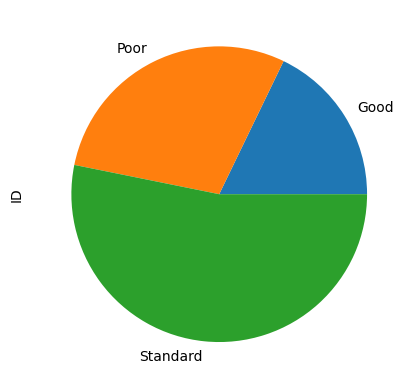


 At Customer Level 



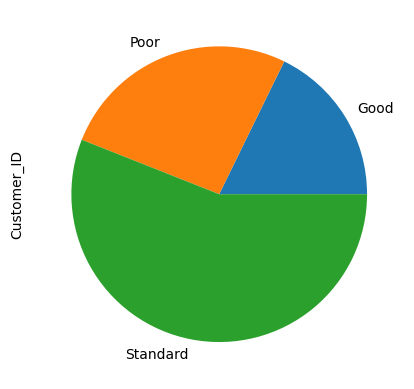

In [50]:
data.groupby("Credit_Score")["ID"].count().plot.pie()
plt.show()
print("\n At Customer Level \n")
data.groupby("Credit_Score")["Customer_ID"].nunique().groupby("Credit_Score").median("nunique").plot.pie()
plt.show()

In [51]:
for i in obj:
    print(data[i].value_counts())
    

Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                 

In [52]:
obj=[]
num=[]
for i in data.columns:
    if data[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if data[i].dtype=="category":
        obj.append(i)
    if data[i].dtype =="float64":
        num.append(i)
    if data[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1', 'Amount_invested_monthly1', 'Credit_History_Months', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'] 

Object columns:  ['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [53]:
obj.remove("ID")
obj.remove("SSN")
obj.remove("Name")
obj.remove("Num_of_Delayed_Payment")
obj.remove("Credit_History_Age")
obj.remove("Customer_ID")
obj.remove("Type_of_Loan")

In [54]:
obj

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

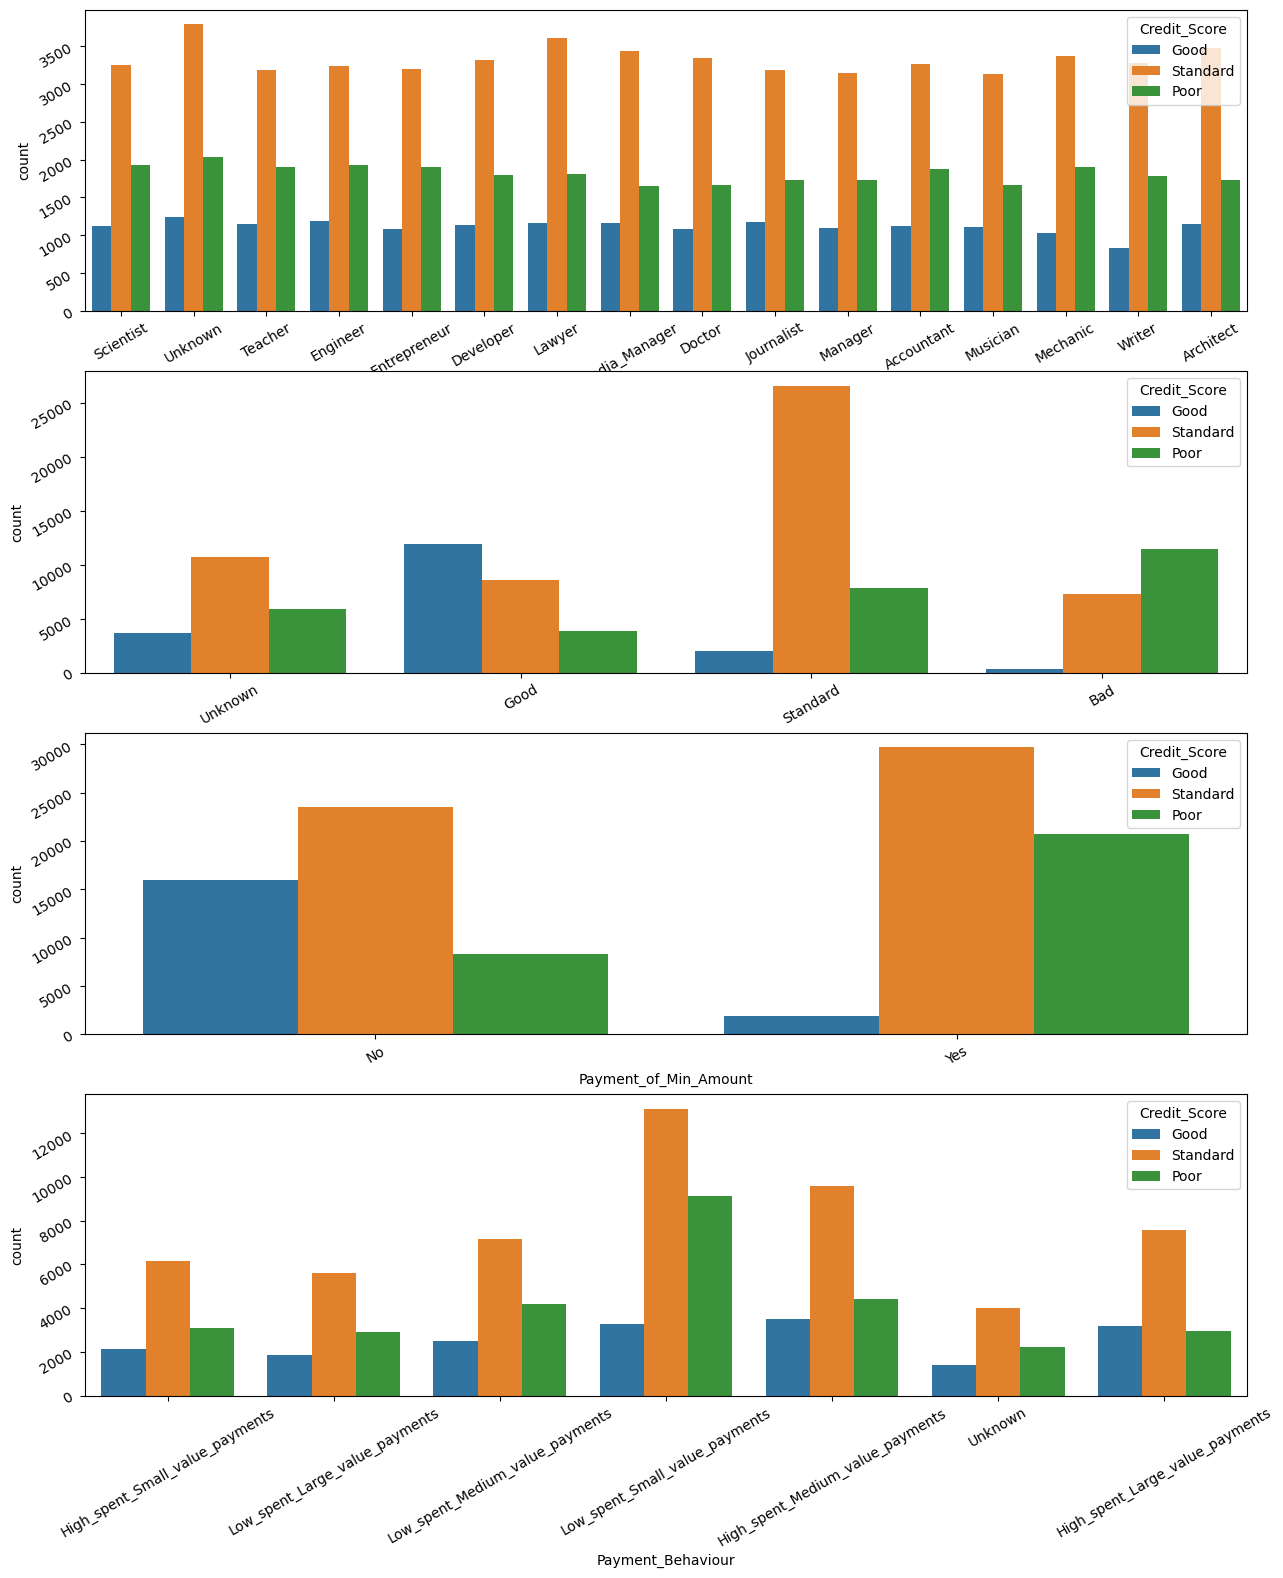

In [55]:
# plt.figure(figsize=(10,6))
j=0
k=0
fig,axs=plt.subplots(nrows=4,figsize=(15,18))
for i in obj:
    sns.countplot(data=data,x=data[i],hue="Credit_Score",ax=axs[j])
    j=j+1
    
for ax in fig.axes:
    ax.tick_params(labelrotation=30)
plt.show()


 Numeric columns

In [56]:
obj=[]
num=[]
for i in data.columns:
    if data[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if data[i].dtype=="category":
        obj.append(i)
    if data[i].dtype =="float64":
        num.append(i)
    if data[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1', 'Amount_invested_monthly1', 'Credit_History_Months', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'] 

Object columns:  ['ID', 'Customer_ID', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [57]:
num

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Monthly_Inhand_Salary1',
 'Num_of_Delayed_Payment1',
 'Amount_invested_monthly1',
 'Credit_History_Months',
 'Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan']

In [58]:
num.remove("Monthly_Inhand_Salary")
num.remove("Amount_invested_monthly")

In [59]:
num1=data[['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Monthly_Balance',
 'Monthly_Inhand_Salary1',
 'Num_of_Delayed_Payment1',
 'Amount_invested_monthly1',"Num_Credit_Inquiries","Credit_History_Months"]].columns

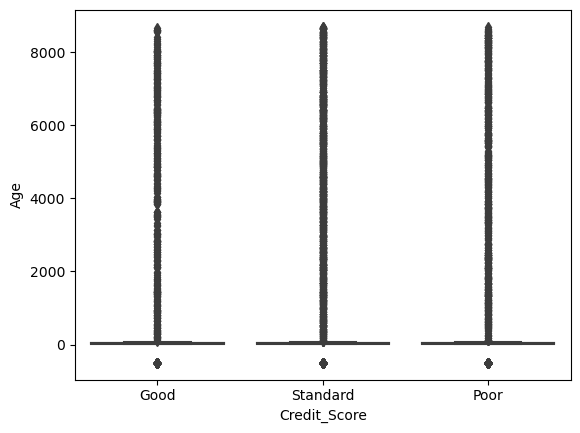

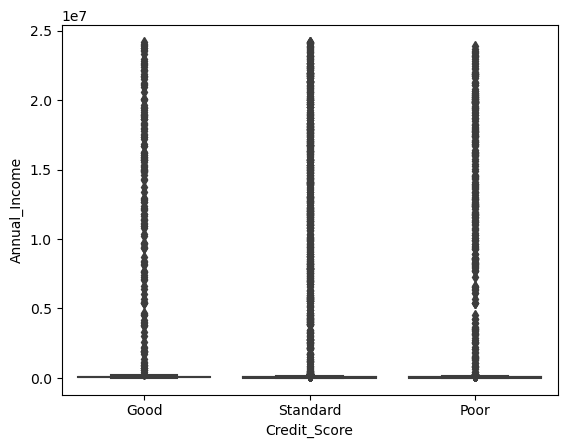

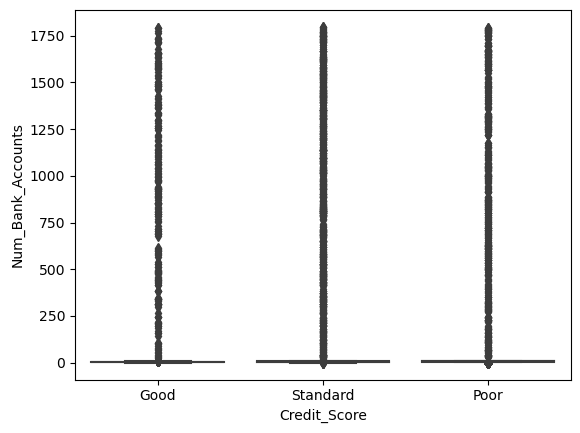

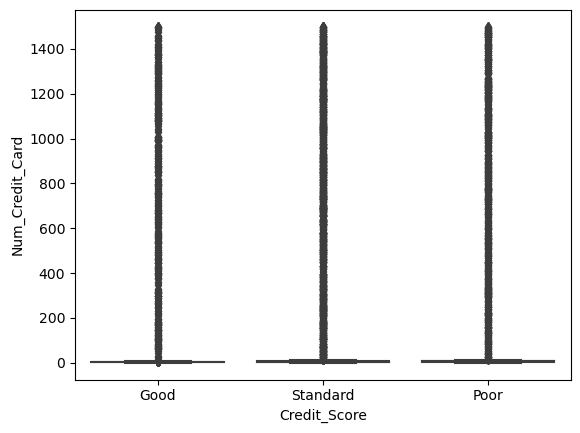

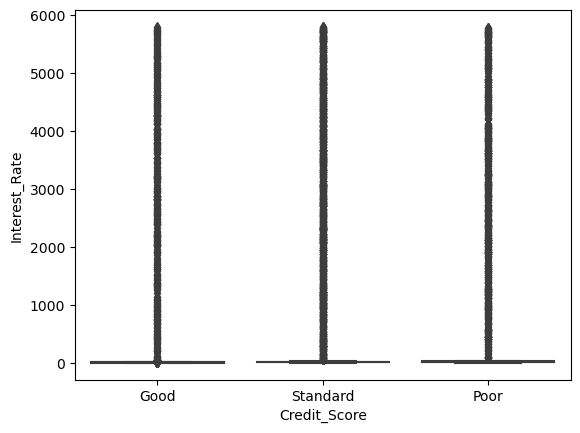

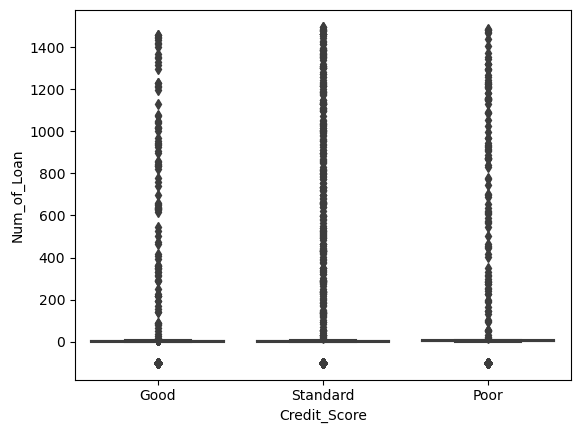

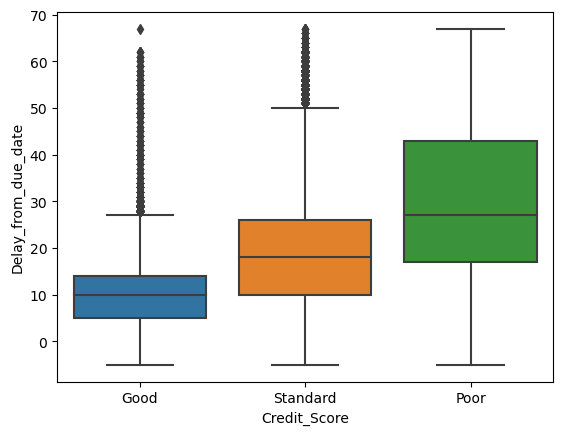

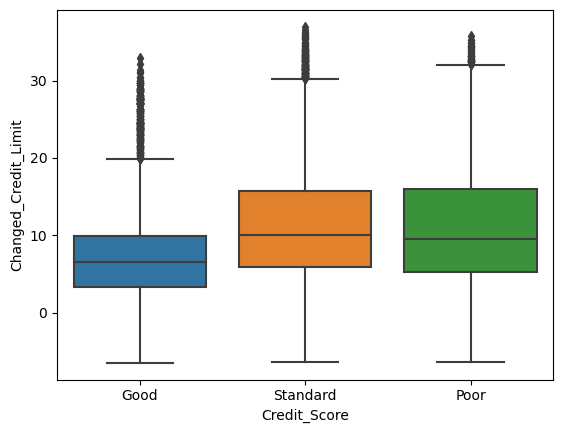

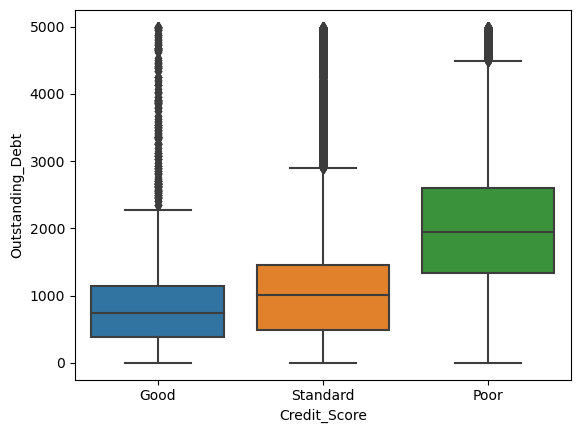

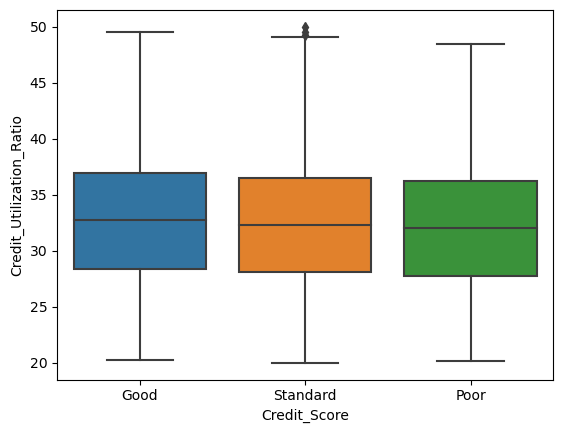

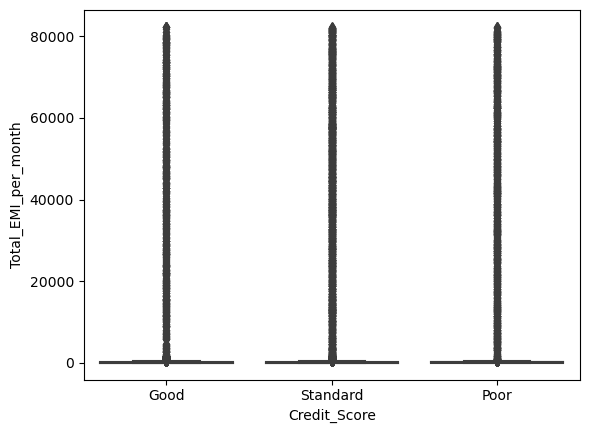

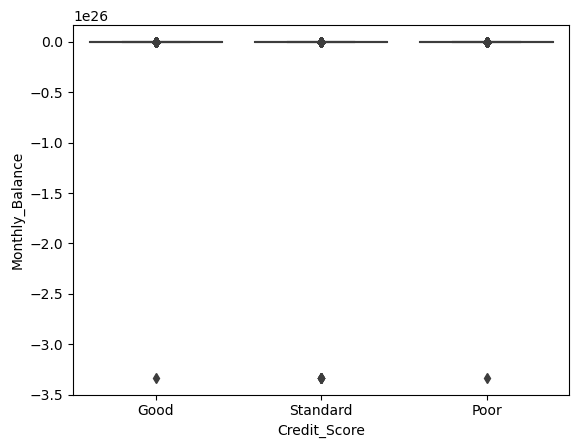

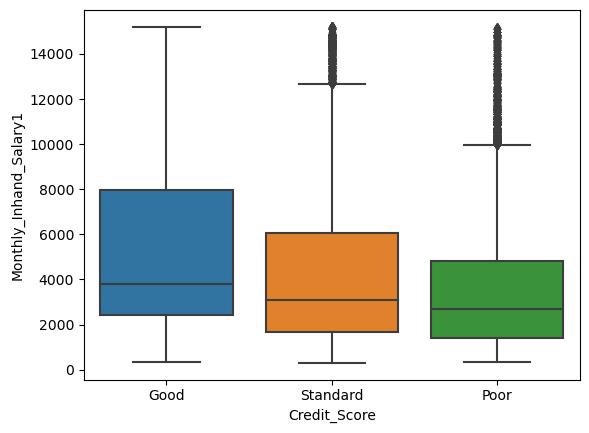

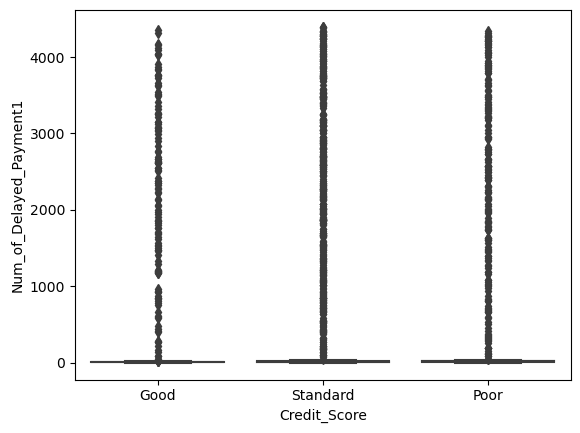

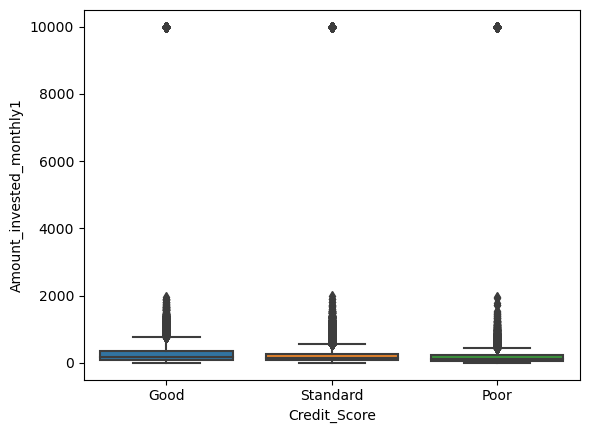

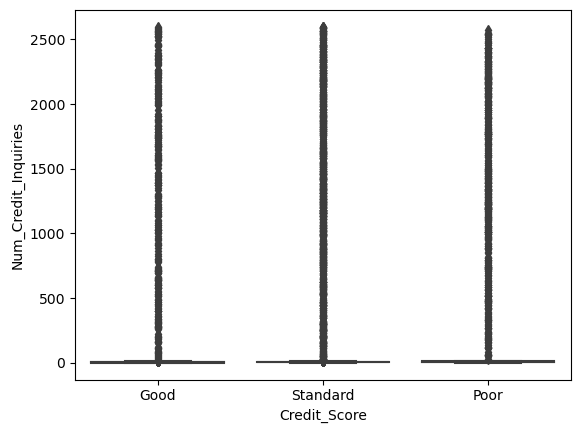

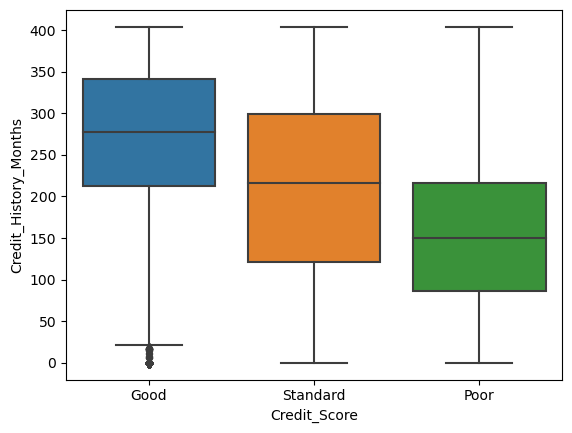

In [60]:
for i in num1:
    sns.boxplot(data=data, y=data[i],x=data["Credit_Score"])
    plt.show()

In [61]:
## Outlier treatment required
def Outlier_treatment(m):
    # Outlier treatment
    q1 = np.percentile(data[m], 25)
    q3 = np.percentile(data[m], 75)
# print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    outliers=[]
    for i in data[m]: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    print("Total Outliers : ", len(outliers))
    print("Lower bound : ", lwr_bound)
    print("Upper Bound : ", upr_bound)
#     return(list(lwr_bound,upr_bound))

In [62]:
m=dict()
for i in num1:
    print("\n")
    print(i)
    Outlier_treatment(i)




Age
-3.0 69.0
Total Outliers :  2781
Lower bound :  -3.0
Upper Bound :  69.0


Annual_Income
-60542.630000000005 152791.05
Total Outliers :  2783
Lower bound :  -60542.630000000005
Upper Bound :  152791.05


Num_Bank_Accounts
-3.0 13.0
Total Outliers :  1315
Lower bound :  -3.0
Upper Bound :  13.0


Num_Credit_Card
-0.5 11.5
Total Outliers :  2271
Lower bound :  -0.5
Upper Bound :  11.5


Interest_Rate
-10.0 38.0
Total Outliers :  2034
Lower bound :  -10.0
Upper Bound :  38.0


Num_of_Loan
-5.0 11.0
Total Outliers :  4348
Lower bound :  -5.0
Upper Bound :  11.0


Delay_from_due_date
-17.0 55.0
Total Outliers :  4002
Lower bound :  -17.0
Upper Bound :  55.0


Changed_Credit_Limit
-9.565000000000001 29.195
Total Outliers :  668
Lower bound :  -9.565000000000001
Upper Bound :  29.195


Outstanding_Debt
-1503.7625 4015.7975
Total Outliers :  5272
Lower bound :  -1503.7625
Upper Bound :  4015.7975


Credit_Utilization_Ratio
15.38642181919627 49.1628077980216
Total Outliers :  4
Lower boun

In [63]:
m

{}

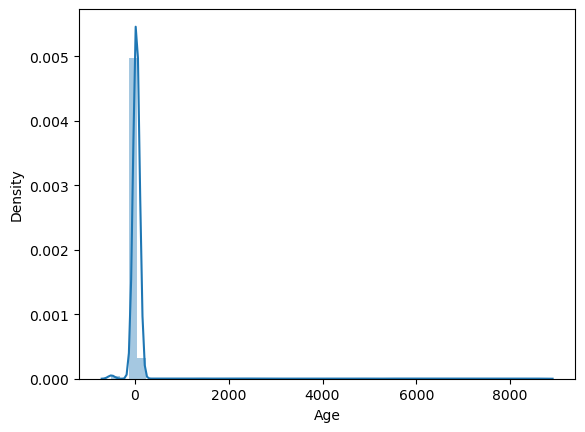

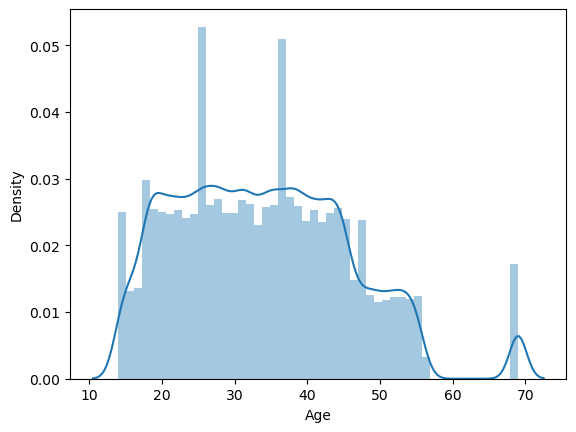

In [64]:
#Age
# Age
# -3.0 69.0
# Total Outliers :  2781
# Lower bound :  -3.0
# Upper Bound :  69.0
sns.distplot(data["Age"])
plt.show()
#age is 18 minimum so lower bound replaced with that
data.loc[data["Age"]<-3,"Age"]=18
data.loc[data["Age"]>69,"Age"]=69
sns.distplot(data["Age"])
plt.show()



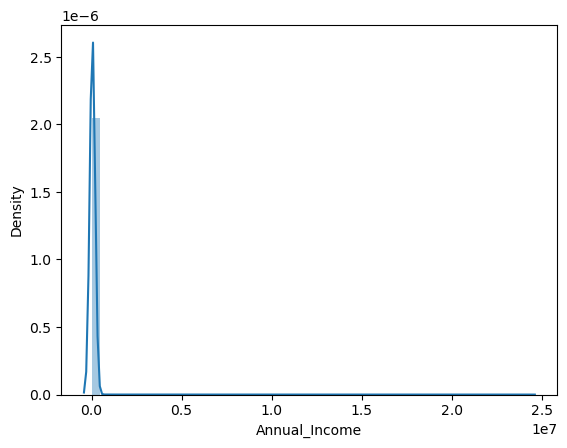

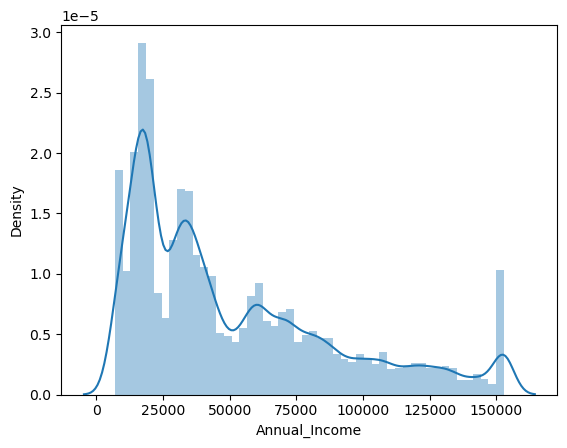

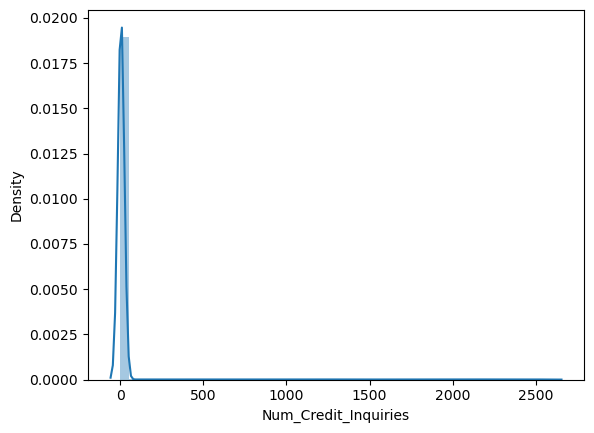

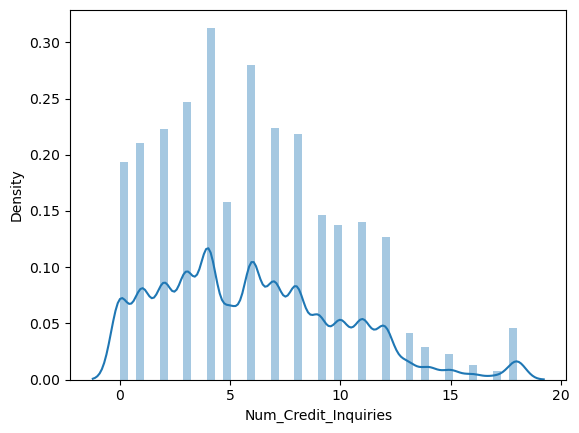

In [65]:
# Annual Income

# Annual_Income
# -60542.630000000005 152791.05
# Total Outliers :  2783
# Lower bound :  -60542.630000000005
# Upper Bound :  152791.05
# data["Annual_Income"].isnull().sum()
sns.distplot(data["Annual_Income"])
plt.show()
data.loc[data["Annual_Income"]<-60542,"Annual_Income"]=-60542
data.loc[data["Annual_Income"]>152791,"Annual_Income"]=152791
sns.distplot(data["Annual_Income"])
plt.show()

# Num_Credit_Inquiries
# -6.0 18.0
# Total Outliers :  1650
# Lower bound :  -6.0
# Upper Bound :  18.0

sns.distplot(data["Num_Credit_Inquiries"])
plt.show()
data.loc[data["Num_Credit_Inquiries"]<-6,"Num_Credit_Inquiries"]=-6
data.loc[data["Num_Credit_Inquiries"]>18,"Num_Credit_Inquiries"]=18
sns.distplot(data["Num_Credit_Inquiries"])
plt.show()



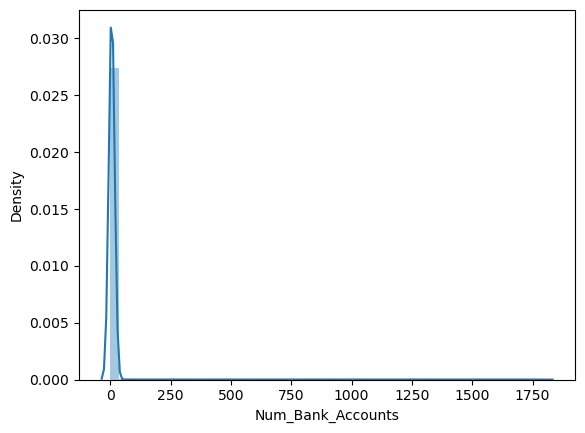

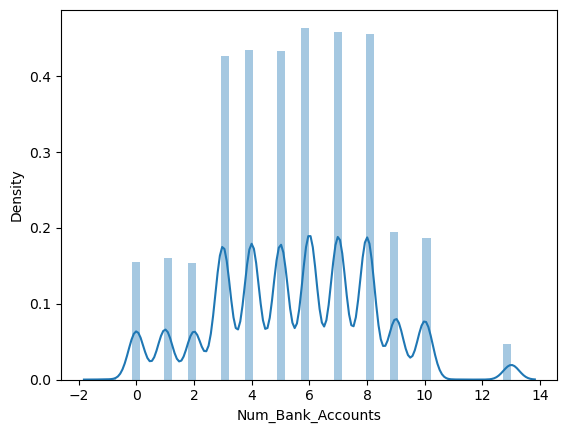

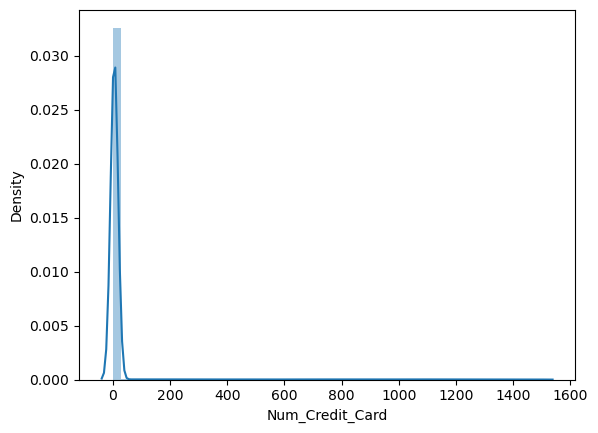

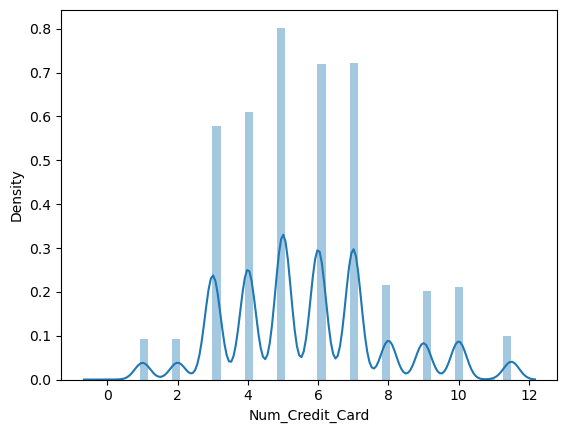

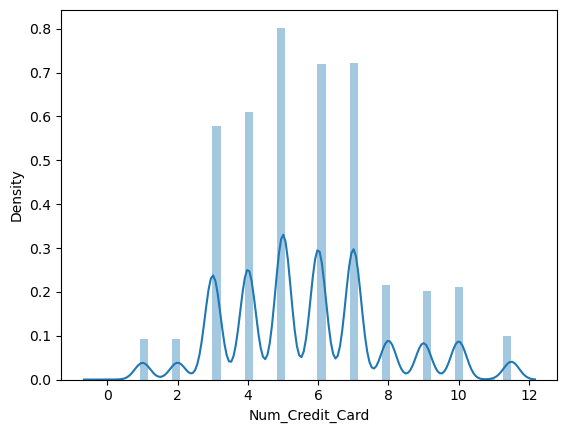

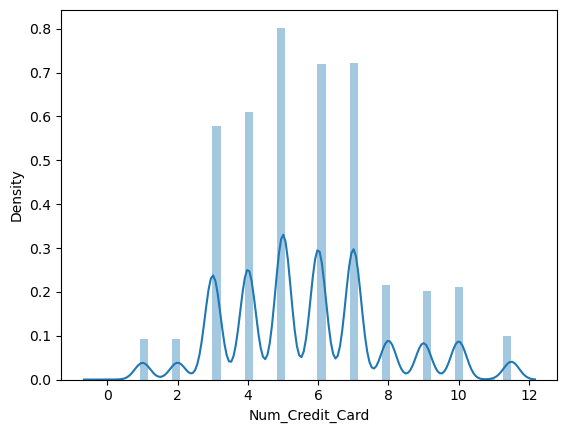

In [66]:
# Num_Bank_Accounts
# -3.0 13.0
# Total Outliers :  1315
# Lower bound :  -3.0
# Upper Bound :  13.0
# Num_Credit_Card
# -0.5 11.5
# Total Outliers :  2271
# Lower bound :  -0.5
# Upper Bound :  11.5


sns.distplot(data["Num_Bank_Accounts"])
plt.show()
# data[data["Num_Bank_Accounts"]<0] ## not much ; safe to replace with 0 
data.loc[data["Num_Bank_Accounts"]<-3,"Num_Bank_Accounts"]=0
data.loc[data["Num_Bank_Accounts"]>13,"Num_Bank_Accounts"]=13
sns.distplot(data["Num_Bank_Accounts"])
plt.show()

sns.distplot(data["Num_Credit_Card"])
plt.show()
data.loc[data["Num_Credit_Card"]<-0.5,"Num_Credit_Card"]=0
data.loc[data["Num_Credit_Card"]>11.5,"Num_Credit_Card"]=11.5
sns.distplot(data["Num_Credit_Card"])
plt.show()


sns.distplot(data["Num_Credit_Card"])
plt.show()
data.loc[data["Num_Credit_Card"]<-0.5,"Num_Credit_Card"]=0
data.loc[data["Num_Credit_Card"]>11.5,"Num_Credit_Card"]=11.5
sns.distplot(data["Num_Credit_Card"])
plt.show()

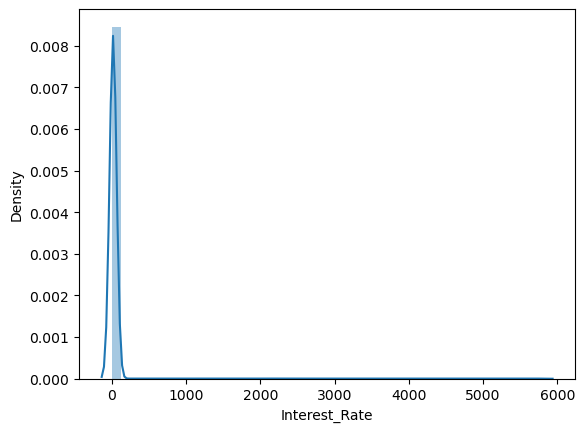

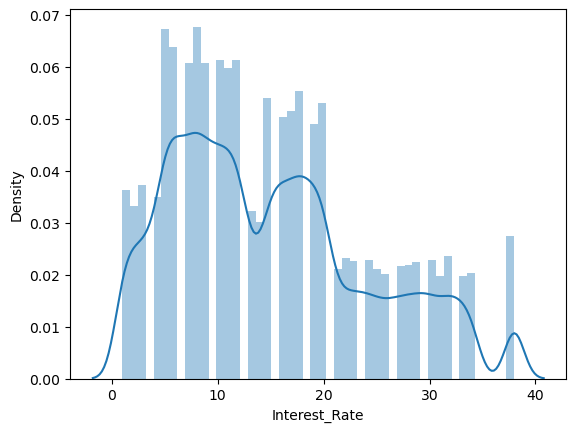

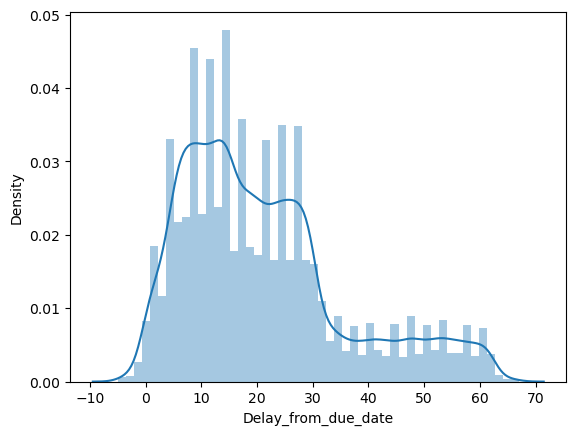

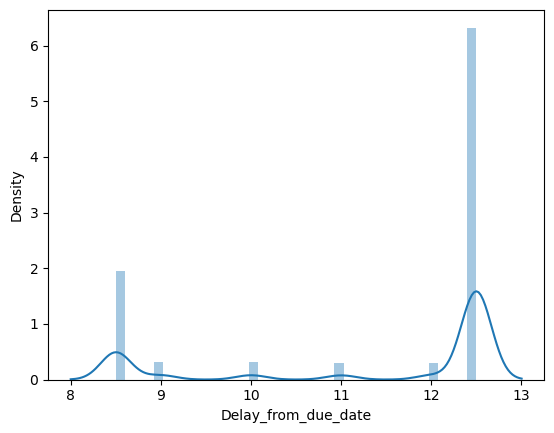

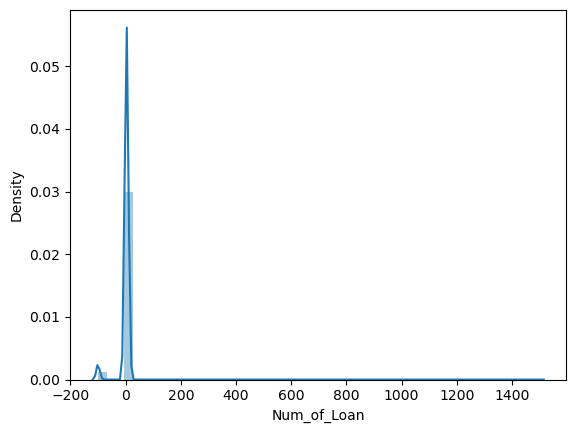

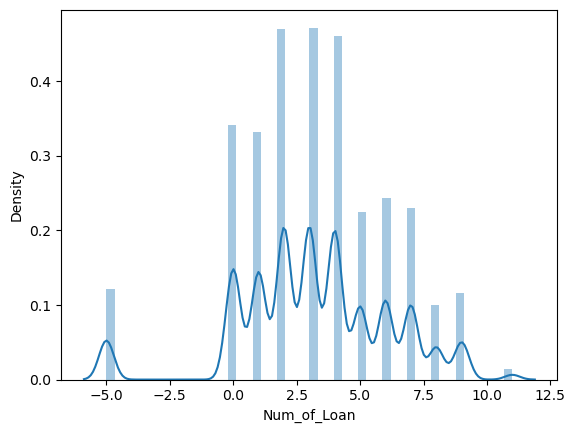

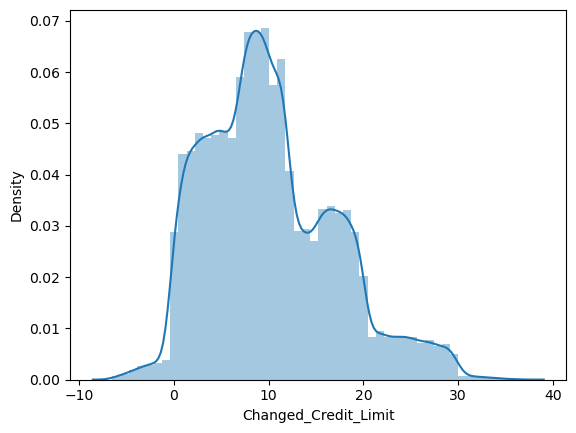

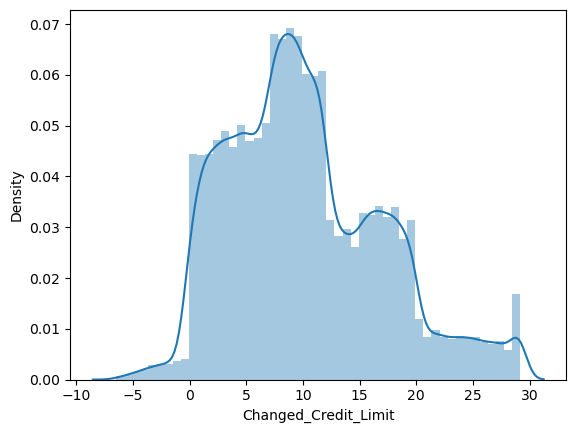

In [67]:


# Interest_Rate
# -10.0 38.0
# Total Outliers :  0
# Lower bound :  -10.0
# Upper Bound :  38.0


# Num_of_Loan
# -5.0 11.0
# Total Outliers :  4348
# Lower bound :  -5.0
# Upper Bound :  11.0


# Delay_from_due_date
# 8.5 12.5
# Total Outliers :  20599
# Lower bound :  8.5
# Upper Bound :  12.5


# Changed_Credit_Limit
# -9.565000000000001 29.195
# Total Outliers :  668
# Lower bound :  -9.565000000000001
# Upper Bound :  29.195

sns.distplot(data["Interest_Rate"])
plt.show()
## negative interest is possible so keeping as it is
data.loc[data["Interest_Rate"]<-10,"Interest_Rate"]=-10
data.loc[data["Interest_Rate"]>38,"Interest_Rate"]=38
sns.distplot(data["Interest_Rate"])
plt.show()

sns.distplot(data["Delay_from_due_date"])
plt.show()
## negative interest is possible so keeping as it is
data.loc[data["Delay_from_due_date"]<8.5,"Delay_from_due_date"]=8.5
data.loc[data["Delay_from_due_date"]>12.5,"Delay_from_due_date"]=12.5
sns.distplot(data["Delay_from_due_date"])
plt.show()


sns.distplot(data["Num_of_Loan"])
plt.show()
## negative interest is possible so keeping as it is
data.loc[data["Num_of_Loan"]<-5,"Num_of_Loan"]=-5
data.loc[data["Num_of_Loan"]>11,"Num_of_Loan"]=11
sns.distplot(data["Num_of_Loan"])
plt.show()

sns.distplot(data["Changed_Credit_Limit"])
plt.show()
## negative interest is possible so keeping as it is
data.loc[data["Changed_Credit_Limit"]<-9.56,"Changed_Credit_Limit"]=-9.56
data.loc[data["Changed_Credit_Limit"]>29.195,"Changed_Credit_Limit"]=29.195
sns.distplot(data["Changed_Credit_Limit"])
plt.show()





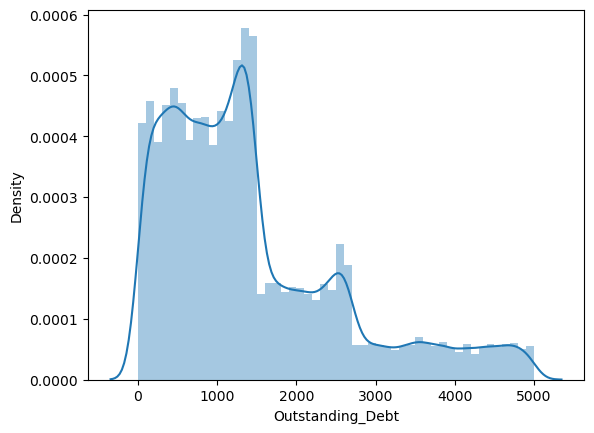

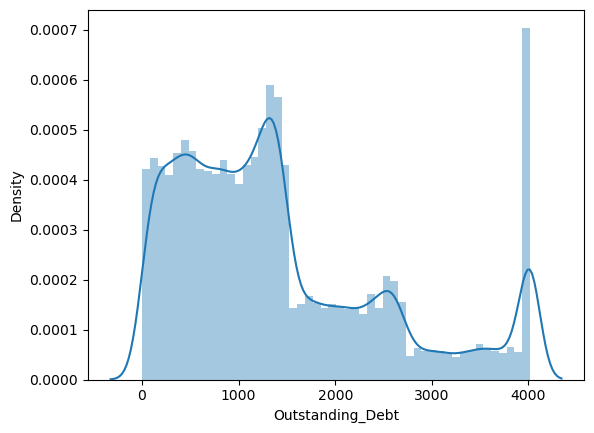

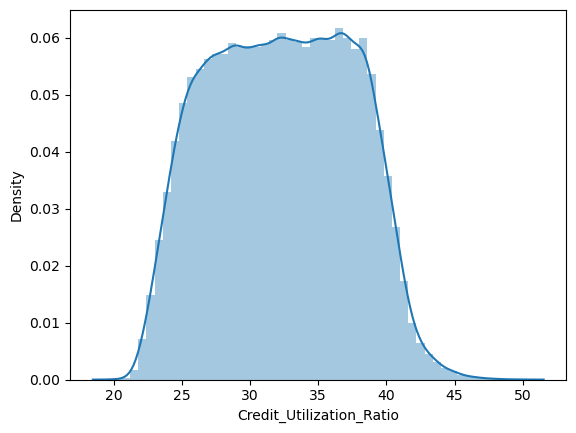

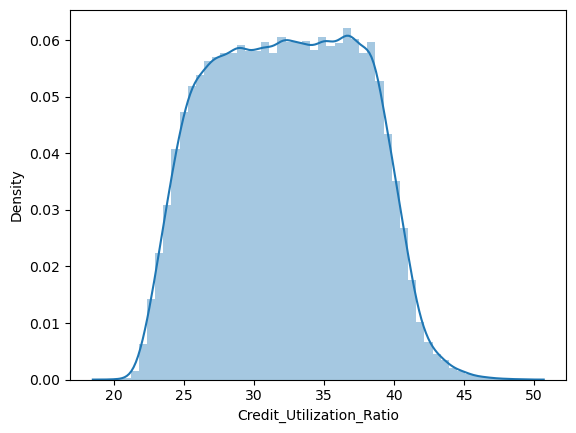

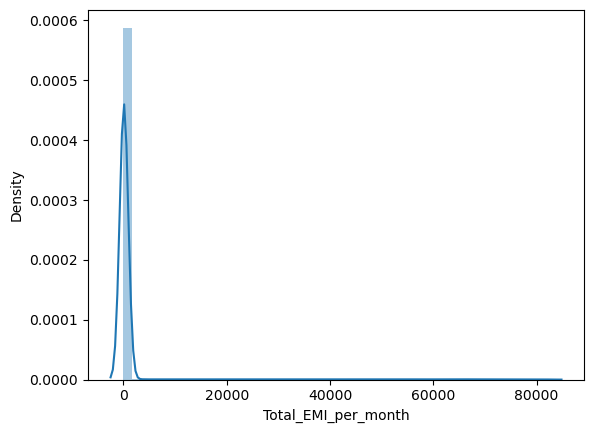

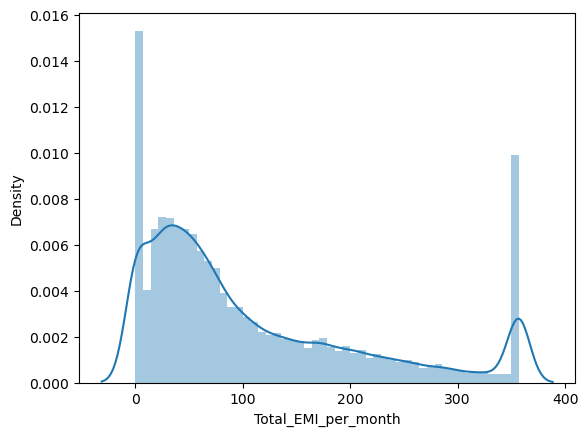

In [68]:
# Outstanding_Debt
# -1503.7625 4015.7975
# Total Outliers :  5272
# Lower bound :  -1503.7625
# Upper Bound :  4015.7975


# Credit_Utilization_Ratio
# 15.38642181919627 49.1628077980216
# Total Outliers :  4
# Lower bound :  15.38642181919627
# Upper Bound :  49.1628077980216


# Total_EMI_per_month
# -166.06972242783047 357.60063203221614
# Total Outliers :  6795
# Lower bound :  -166.06972242783047
# Upper Bound :  357.60063203221614



sns.distplot(data["Outstanding_Debt"])
plt.show()
data.loc[data["Outstanding_Debt"]<-1503.7625,"Outstanding_Debt"]=-1503.7625
data.loc[data["Outstanding_Debt"]>4015.7975,"Outstanding_Debt"]=4015.7975
sns.distplot(data["Outstanding_Debt"])
plt.show()

sns.distplot(data["Credit_Utilization_Ratio"])
plt.show()
data.loc[data["Credit_Utilization_Ratio"]<15.38,"Credit_Utilization_Ratio"]=15.38
data.loc[data["Credit_Utilization_Ratio"]>49.16,"Credit_Utilization_Ratio"]=49.16
sns.distplot(data["Credit_Utilization_Ratio"])
plt.show()


sns.distplot(data["Total_EMI_per_month"])
plt.show()
data.loc[data["Total_EMI_per_month"]<-166,"Total_EMI_per_month"]=-166
data.loc[data["Total_EMI_per_month"]>357,"Total_EMI_per_month"]=357
sns.distplot(data["Total_EMI_per_month"])
plt.show()


                      mean      median
Credit_Score                          
Good         -1.929347e+22  399.939577
Poor         -1.180233e+22  299.333414
Standard     -4.520912e+22  343.532812
              count
Credit_Score       
Good            551
Poor            755
Standard       1562
Credit_Score
Good        17828
Poor        28998
Standard    53174
Name: Customer_ID, dtype: int64
-33.87291156442603 761.9272047321292
Total Outliers :  7748
Lower bound :  -33.87291156442603
Upper Bound :  761.9272047321292


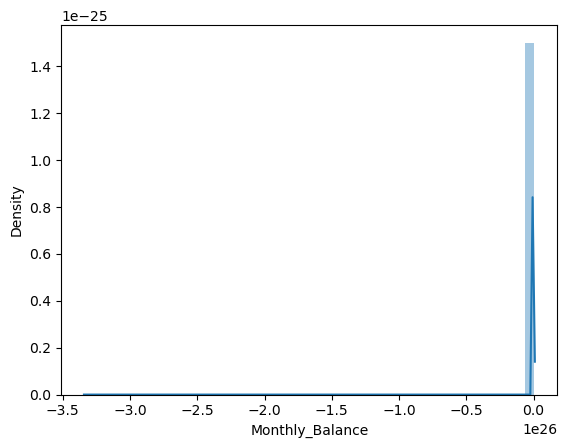

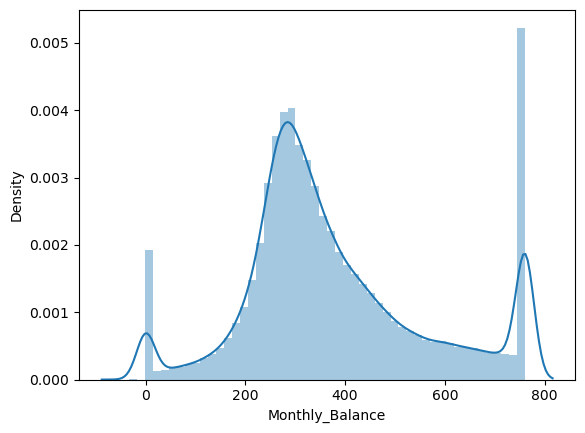

In [69]:
# Monthly_Balance
# nan nan
# Total Outliers :  0
# Lower bound :  nan
# Upper Bound :  nan

data["Monthly_Balance"].isnull().sum()

## replacing null with 0 
print(data.groupby(["Credit_Score"])["Monthly_Balance"].agg(["mean","median"]))
print(data[data["Monthly_Balance"].isnull()].groupby(["Credit_Score"])["Customer_ID"].agg(["count"]))
print(data.groupby("Credit_Score")["Customer_ID"].count())
## Lets impute with 0 as mean median wont handle class imbalance
## so need to be removed

data["Monthly_Balance"]=data["Monthly_Balance"].fillna(0)
Outlier_treatment("Monthly_Balance")

sns.distplot(data["Monthly_Balance"])
plt.show()
data.loc[data["Monthly_Balance"]<-33,"Monthly_Balance"]=-33
data.loc[data["Monthly_Balance"]>761,"Monthly_Balance"]=761
sns.distplot(data["Monthly_Balance"])
plt.show()


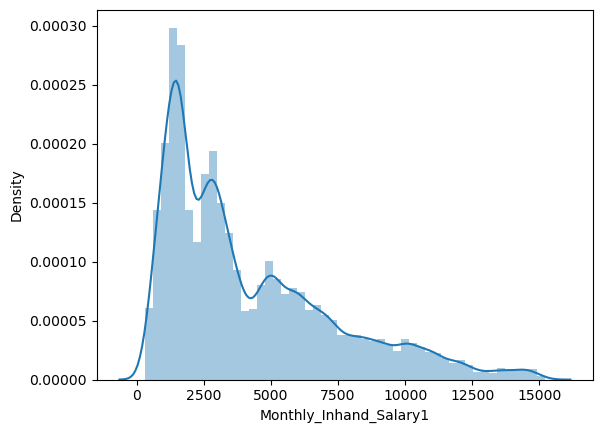

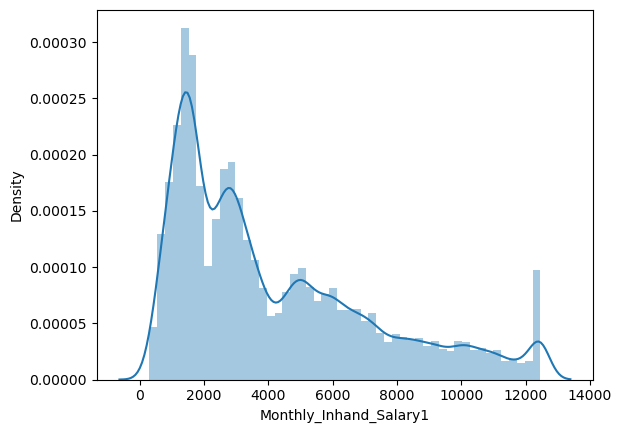

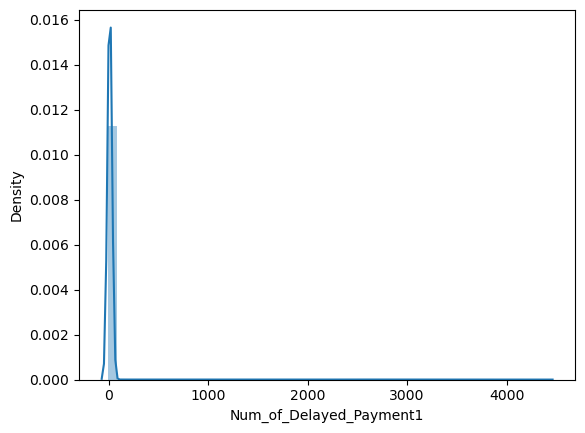

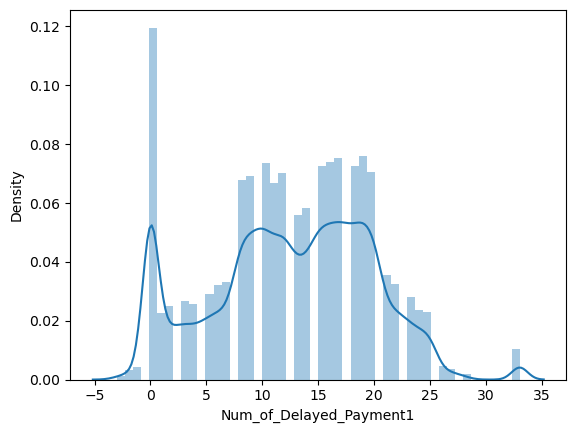

In [70]:
# Monthly_Inhand_Salary1
# -4872.676666666667 12455.95
# Total Outliers :  2024
# Lower bound :  -4872.676666666667
# Upper Bound :  12455.95

sns.distplot(data["Monthly_Inhand_Salary1"])
plt.show()
data.loc[data["Monthly_Inhand_Salary1"]<-4872.67,"Monthly_Inhand_Salary1"]=-4872.67
data.loc[data["Monthly_Inhand_Salary1"]>12455.95,"Monthly_Inhand_Salary1"]=12455.95
sns.distplot(data["Monthly_Inhand_Salary1"])
plt.show()


# Num_of_Delayed_Payment1
# -7.0 33.0
# Total Outliers :  736
# Lower bound :  -7.0
# Upper Bound :  33.0

sns.distplot(data["Num_of_Delayed_Payment1"])
plt.show()
data.loc[data["Num_of_Delayed_Payment1"]<-7,"Num_of_Delayed_Payment1"]=-7
data.loc[data["Num_of_Delayed_Payment1"]>33,"Num_of_Delayed_Payment1"]=33
sns.distplot(data["Num_of_Delayed_Payment1"])
plt.show()



                    mean      median
Credit_Score                        
Good          691.437243  167.128599
Poor          615.258227  119.362018
Standard      631.400248  137.290229
              count
Credit_Score       
Good            823
Poor           1332
Standard       2324
Credit_Score
Good        17828
Poor        28998
Standard    53174
Name: Customer_ID, dtype: int64
-213.9787682400842 536.4491774895422
Total Outliers :  10495
Lower bound :  -213.9787682400842
Upper Bound :  536.4491774895422


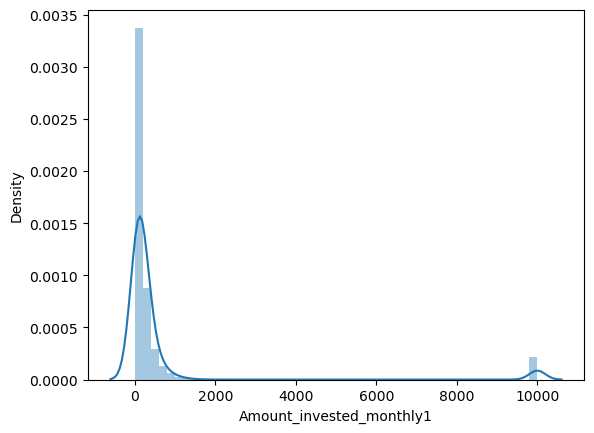

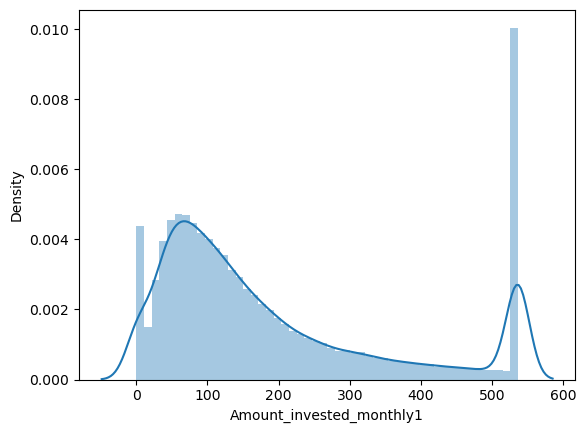

In [71]:

# Amount_invested_monthly1
# nan nan
# Total Outliers :  0
# Lower bound :  nan
# Upper Bound :  nan

data["Amount_invested_monthly1"].isnull().sum()
print(data.groupby(["Credit_Score"])["Amount_invested_monthly1"].agg(["mean","median"]))
print(data[data["Amount_invested_monthly1"].isnull()].groupby(["Credit_Score"])["Customer_ID"].agg(["count"]))
print(data.groupby("Credit_Score")["Customer_ID"].count())
data["Amount_invested_monthly1"]=data["Amount_invested_monthly1"].fillna(0)

## same for poor it is around 
Outlier_treatment("Amount_invested_monthly1")


sns.distplot(data["Amount_invested_monthly1"])
plt.show()
data.loc[data["Amount_invested_monthly1"]<-213.9787682400842,"Amount_invested_monthly1"]=-213.9787682400842
data.loc[data["Amount_invested_monthly1"]>536.4491774895422,"Amount_invested_monthly1"]=536.4491774895422
sns.distplot(data["Amount_invested_monthly1"])
plt.show()


In [72]:
num1

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Monthly_Balance', 'Monthly_Inhand_Salary1',
       'Num_of_Delayed_Payment1', 'Amount_invested_monthly1',
       'Num_Credit_Inquiries', 'Credit_History_Months'],
      dtype='object')

In [73]:
obj

['ID',
 'Customer_ID',
 'Name',
 'SSN',
 'Occupation',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

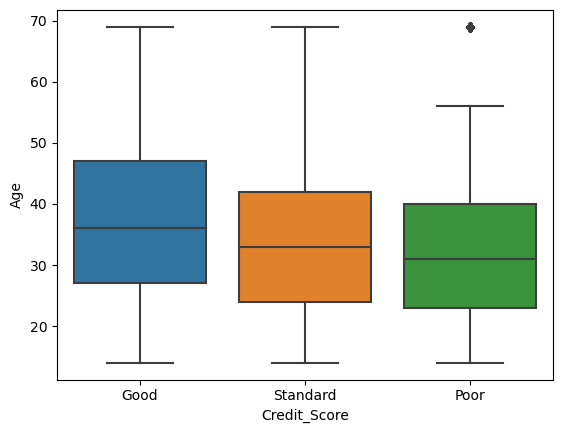

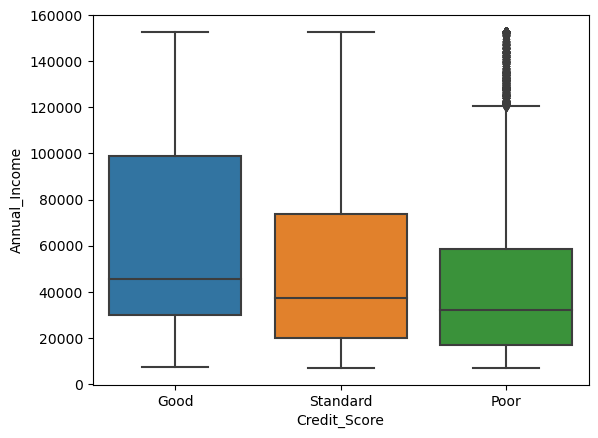

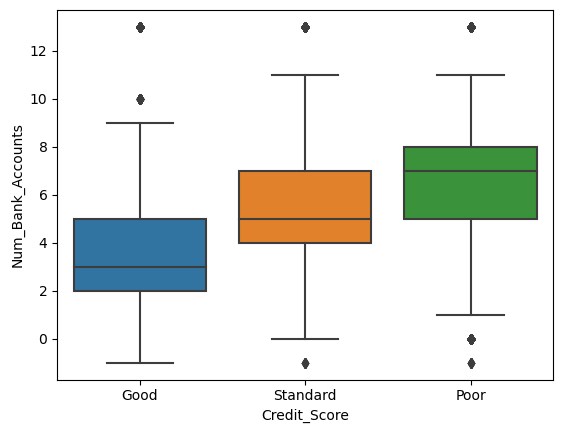

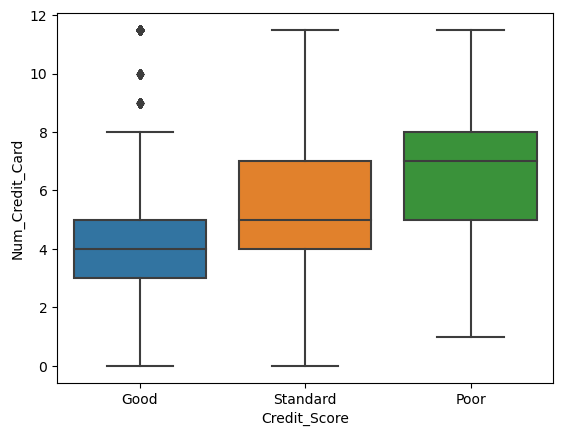

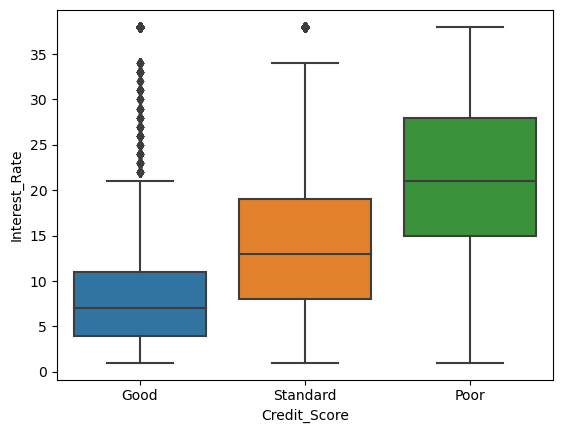

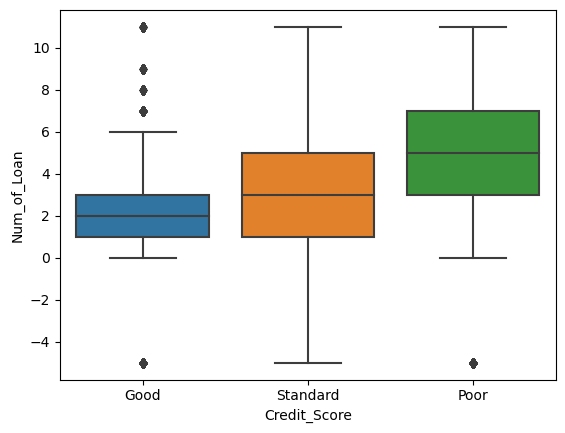

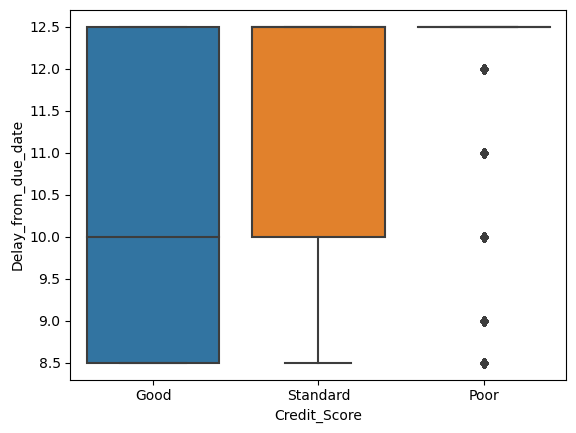

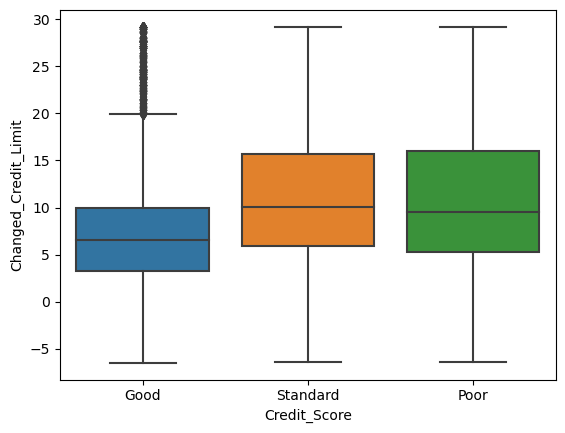

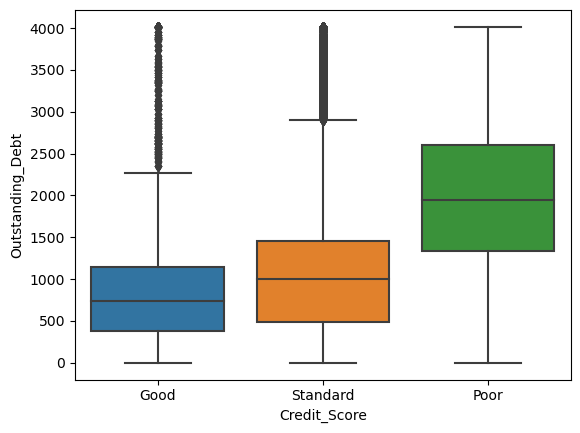

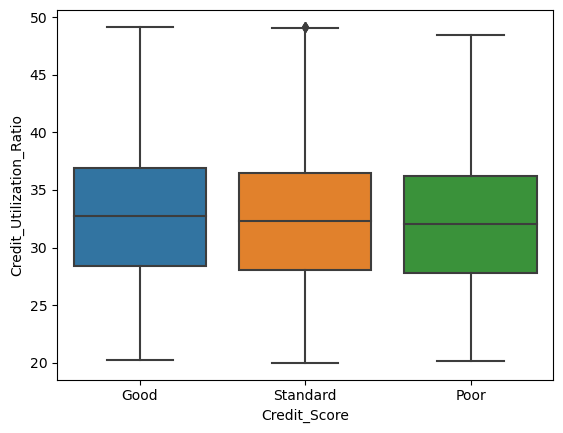

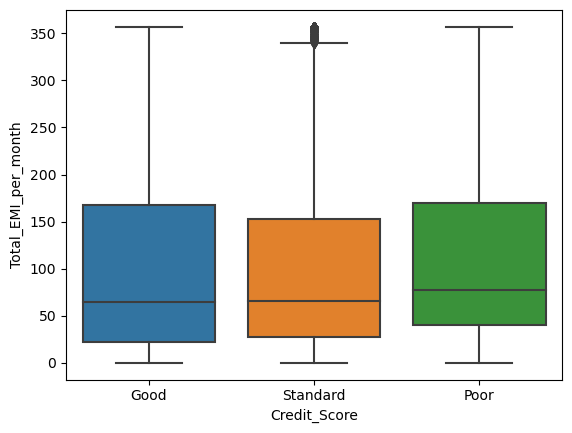

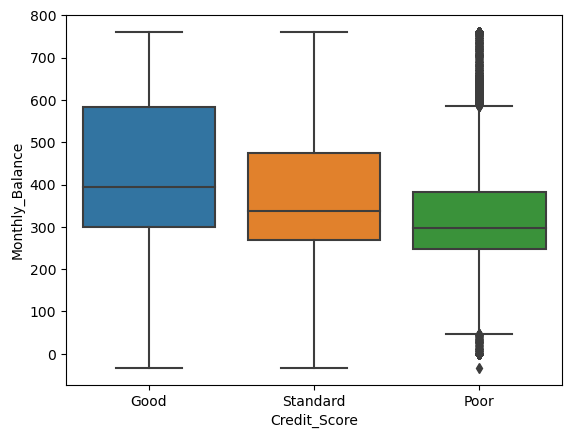

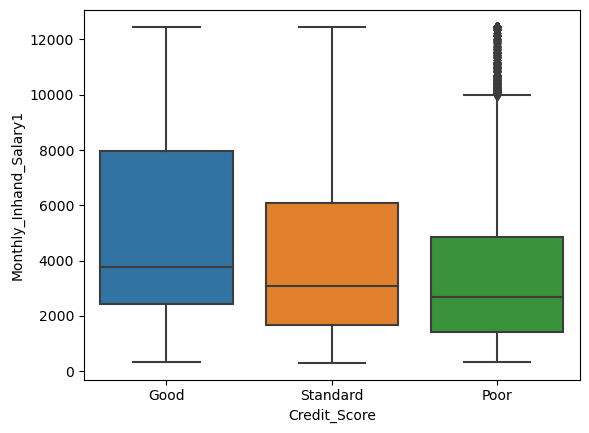

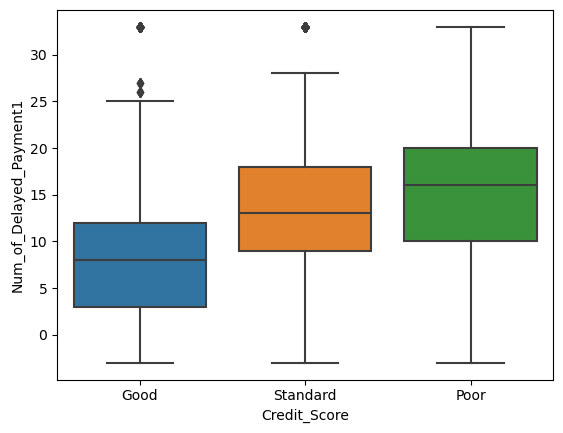

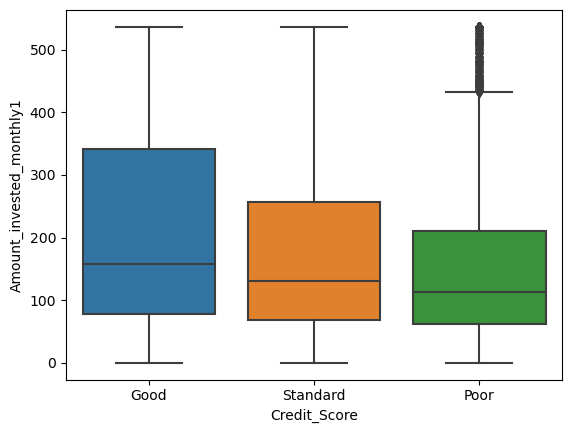

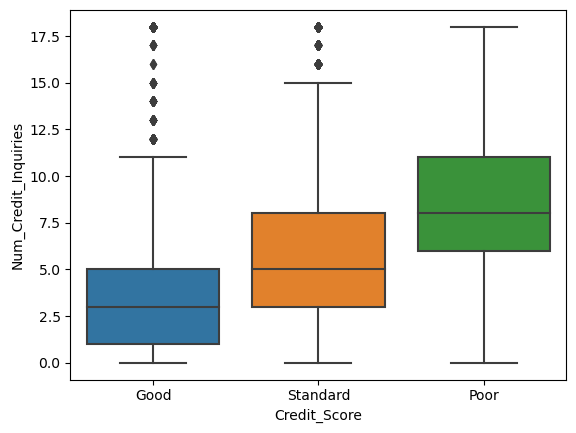

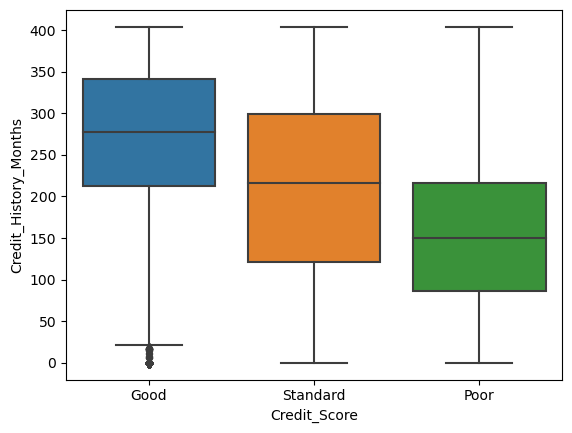

In [74]:
for i in num1:
    sns.boxplot(data=data, y=data[i],x=data["Credit_Score"])
    plt.show()

In [75]:
obj

['ID',
 'Customer_ID',
 'Name',
 'SSN',
 'Occupation',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

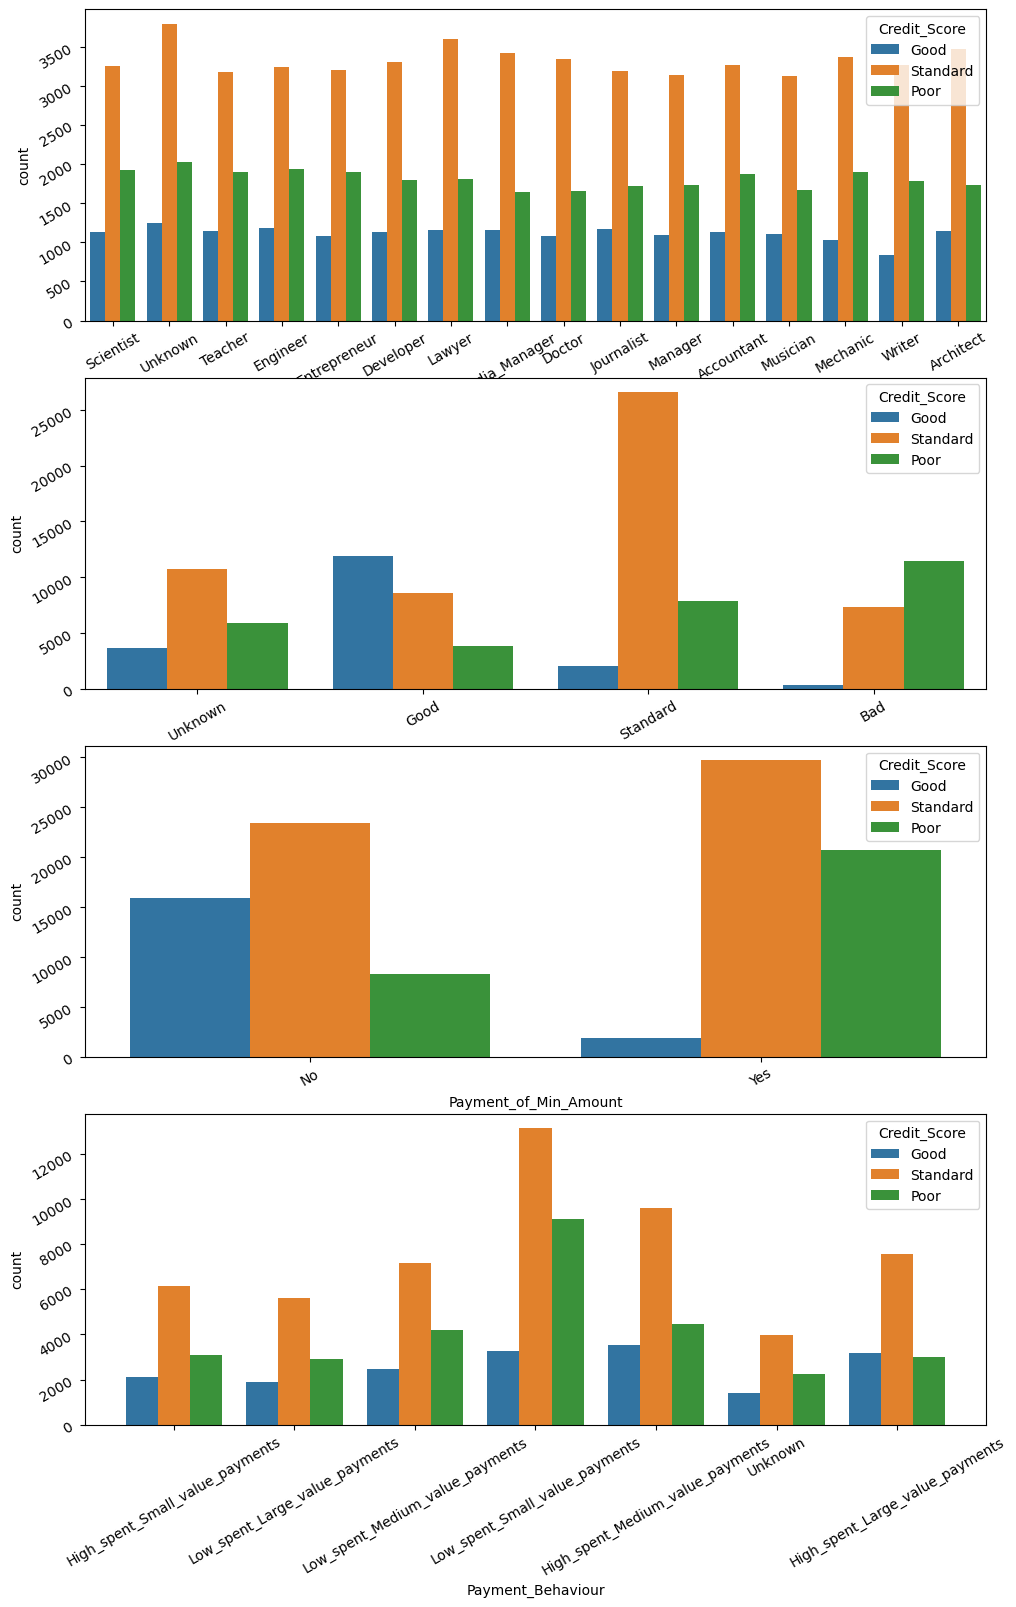

In [76]:
fig,axs=plt.subplots(nrows=4,figsize=(10,15))
fig.tight_layout(pad=2)

j=0
ob_pl=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

for i in ob_pl:
    sns.countplot(data=data,x=data[i],hue="Credit_Score",ax=axs[j])
    j=j+1
    
for ax in fig.axes:
    ax.tick_params(labelrotation=30)
plt.autoscale()
    

In [77]:

data1=data.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Num_of_Delayed_Payment","Amount_invested_monthly","Type_of_Loan","Credit_History_Age"],1)

In [78]:

for i in data1[['Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix',"Occupation"]].columns:
    print(data1[i].value_counts())
data1 = pd.get_dummies(data1, columns=['Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix',"Occupation"], drop_first=True)

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Unknown                              7600
Name: Payment_Behaviour, dtype: int64
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: Credit_Mix, dtype: int64
Unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [79]:
data1["Credit_Score"]=data["Credit_Score"].replace({"Good":0,"Poor":1,"Standard":2})

In [80]:
data1=data1.fillna(0)

In [81]:
data1.isnull().sum()

Age                                                   0
Annual_Income                                         0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Total_EMI_per_month                                   0
Monthly_Balance                                       0
Credit_Score                                          0
Monthly_Inhand_Salary1                                0
Num_of_Delayed_Payment1                               0
Amount_invested_monthly1                              0
Credit_History_Months                           

In [82]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 51 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Num_Bank_Accounts                                   100000 non-null  int64  
 3   Num_Credit_Card                                     100000 non-null  float64
 4   Interest_Rate                                       100000 non-null  int64  
 5   Num_of_Loan                                         100000 non-null  int64  
 6   Delay_from_due_date                                 100000 non-null  float64
 7   Changed_Credit_Limit                                100000 non-null  float64
 8   Num_Credit_Inquiries                                100000 non-nu

# Model Building

In [83]:
print(92400/(3*16445))
print(92400/(3*26773))
print(92400/(3*49182))
wt={0:1.87,1:1.15,2:0.62}

1.8729096989966556
1.1504127292421469
0.6262453743239397


In [84]:
X = data1.drop(['Credit_Score'], axis=1)

y = data1['Credit_Score']

In [85]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [86]:
# simple decioson tree with class weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

t = DecisionTreeClassifier(random_state=0,class_weight=wt)
t.fit(X_train, y_train)
y_pred = t.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.6841333333333334

 clasification report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60      5318
           1       0.67      0.66      0.67      8803
           2       0.72      0.73      0.72     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.68      0.68     30000


 confussion matrix:
 [[ 3194   251  1873]
 [  278  5812  2713]
 [ 1806  2555 11518]]


In [87]:
## Undersampling Tomek Links

from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

under_sample=TomekLinks()
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_resampled_us, y_resampled_us)
y_pred_us = dtc.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.7025333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      5318
           1       0.70      0.71      0.71      8803
           2       0.75      0.71      0.73     15879

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000


 confussion matrix:
 [[ 3471   278  1569]
 [  380  6266  2157]
 [ 2160  2380 11339]]


In [88]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=20)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)
dtc_sm = DecisionTreeClassifier(random_state=0,class_weight=wt)
dtc_sm.fit(X_resampled_smt, y_resampled_smt)
y_pred_sm = dtc_sm.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_sm))
print ('\n clasification report:\n', classification_report(y_test,y_pred_sm))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_sm))

Accuracy:  0.6804666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60      5318
           1       0.66      0.67      0.67      8803
           2       0.72      0.72      0.72     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.68      0.68     30000


 confussion matrix:
 [[ 3157   298  1863]
 [  288  5870  2645]
 [ 1819  2673 11387]]


In [89]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dtc_sm.feature_importances_
})
imp_df.sort_values(by="Imp",ascending=False).reset_index()

,index,Varname,Imp
0,9,Outstanding_Debt,0.321422
1,33,Credit_Mix_Standard,0.101043
2,4,Interest_Rate,0.042748
3,25,Payment_of_Min_Amount_Yes,0.041703
4,16,Credit_History_Months,0.037510
5,7,Changed_Credit_Limit,0.035032
6,11,Total_EMI_per_month,0.029770
7,1,Annual_Income,0.029051
8,0,Age,0.028727
9,3,Num_Credit_Card,0.028213


In [90]:
## tuning
# Undersampling performed well ; lets try to hypertune it
# Hypertuning undersampling

params = {
    "max_depth": [5,6,7,10,15,20],
    "max_features":[30,35,40,50],
    "criterion":["gini","entropy"]
}


In [91]:
## Undersampling hypertuning
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_resampled_us, y_resampled_us)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
dt_us_g=grid_search.best_estimator_

Fitting 4 folds for each of 48 candidates, totalling 192 fits
0.736779706175988
DecisionTreeClassifier(max_depth=15, max_features=40, random_state=0)


In [92]:

dtc_us_g = DecisionTreeClassifier(max_depth=7,
                       max_features=40, random_state=0)
dtc_us_g.fit(X_resampled_us, y_resampled_us)
y_pred_us1 = dtc_us_g.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_us1))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us1))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us1))



Accuracy:  0.6847333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58      5318
           1       0.73      0.60      0.66      8803
           2       0.73      0.74      0.74     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.67      0.66     30000
weighted avg       0.69      0.68      0.69     30000


 confussion matrix:
 [[ 3473   140  1705]
 [  908  5313  2582]
 [ 2317  1806 11756]]


In [93]:
# grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(grid_search.cv_results_)
df.sort_values(by="rank_test_score",ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
18,1.305527,0.008771,0.012148,0.000166,gini,15,40,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.739966,0.738278,0.733212,0.735663,0.736780,0.002568,1
19,1.649524,0.003410,0.011745,0.000825,gini,15,50,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.733667,0.734901,0.727692,0.743651,0.734978,0.005702,2
17,1.136694,0.006980,0.011976,0.000478,gini,15,35,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.735940,0.738018,0.736394,0.729428,0.734945,0.003278,3
22,1.543021,0.009462,0.012873,0.000414,gini,20,40,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.742434,0.733797,0.731134,0.732026,0.734848,0.004484,4
23,1.901487,0.011558,0.013048,0.000681,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.728211,0.728731,0.735355,0.740794,0.733273,0.005176,5
21,1.345509,0.014313,0.012936,0.000286,gini,20,35,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.725549,0.730160,0.738408,0.738261,0.733094,0.005488,6
20,1.165122,0.003628,0.013105,0.000489,gini,20,30,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.733991,0.734186,0.724185,0.737936,0.732575,0.005093,7
16,1.076970,0.058193,0.011666,0.000187,gini,15,30,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.733602,0.730809,0.731718,0.730272,0.731600,0.001266,8
15,1.428215,0.141001,0.012531,0.004789,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.730160,0.731783,0.733732,0.728778,0.731113,0.001848,9
14,0.946201,0.005365,0.011052,0.000208,gini,10,40,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.729575,0.733667,0.731004,0.729298,0.730886,0.001731,10


In [94]:
dtc_us_g1 = DecisionTreeClassifier(max_depth=7,
                       max_features=35, random_state=0)
dtc_us_g1.fit(X_resampled_us, y_resampled_us)
y_pred_us2 = dtc_us_g1.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_us2))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us2))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us2))



Accuracy:  0.6846333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.64      0.58      5318
           1       0.71      0.62      0.66      8803
           2       0.74      0.73      0.74     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.67      0.66     30000
weighted avg       0.69      0.68      0.69     30000


 confussion matrix:
 [[ 3427   232  1659]
 [  845  5447  2511]
 [ 2257  1957 11665]]


In [95]:
## SMOTE hypertuning
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtc_sm,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_resampled_smt, y_resampled_smt)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
dt_sm_g=grid_search.best_estimator_

Fitting 4 folds for each of 48 candidates, totalling 192 fits
0.7421466810968438
DecisionTreeClassifier(class_weight={0: 1.87, 1: 1.15, 2: 0.62}, max_depth=20,
                       max_features=35, random_state=0)


In [96]:

dt_sm_g.fit(X_resampled_smt, y_resampled_smt)
y_pred_sm1 = dt_sm_g.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_sm1))
print ('\n clasification report:\n', classification_report(y_test,y_pred_sm1))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_sm1))


Accuracy:  0.6769666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.72      0.60      5318
           1       0.66      0.73      0.70      8803
           2       0.78      0.63      0.70     15879

    accuracy                           0.68     30000
   macro avg       0.65      0.69      0.67     30000
weighted avg       0.70      0.68      0.68     30000


 confussion matrix:
 [[ 3833   291  1194]
 [  688  6440  1675]
 [ 2872  2971 10036]]


In [97]:
# grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(grid_search.cv_results_)
df.sort_values(by="rank_test_score",ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
21,3.125392,0.120181,0.024755,0.007900,gini,20,35,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.660732,0.738086,0.784277,0.785492,0.742147,0.050741,1
20,2.639594,0.069653,0.021939,0.000822,gini,20,30,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.664128,0.735369,0.779843,0.783383,0.740681,0.048077,2
17,2.634504,0.142968,0.018168,0.000758,gini,15,35,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.686615,0.748347,0.765543,0.757499,0.739501,0.031134,3
16,2.286551,0.069323,0.020855,0.001598,gini,15,30,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.692800,0.738372,0.765042,0.761682,0.739474,0.028838,4
19,3.675619,0.117644,0.018934,0.000700,gini,15,50,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.692800,0.739123,0.763362,0.758643,0.738482,0.027896,5
23,4.342166,0.144763,0.020820,0.001102,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.658730,0.725930,0.786994,0.780558,0.738053,0.051578,6
18,2.983468,0.119941,0.020172,0.002150,gini,15,40,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.687008,0.737371,0.760073,0.760395,0.736212,0.029902,7
42,3.841941,0.159284,0.019898,0.001467,entropy,15,40,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.682575,0.737335,0.768367,0.756498,0.736194,0.032877,8
22,3.555320,0.126327,0.022963,0.002459,gini,20,40,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.657050,0.728826,0.783240,0.775303,0.736105,0.050152,9
43,4.663546,0.172130,0.020195,0.001726,entropy,15,50,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.678357,0.735190,0.768582,0.755568,0.734424,0.034489,10


In [98]:
dtc_sm_g = DecisionTreeClassifier(max_depth=13,
                       max_features=15, random_state=0)
dt_sm_g.fit(X_resampled_smt, y_resampled_smt)
y_pred_sm2 = dt_sm_g.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_sm2))
print ('\n clasification report:\n', classification_report(y_test,y_pred_sm2))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_sm2))

## decent recall

Accuracy:  0.6769666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.52      0.72      0.60      5318
           1       0.66      0.73      0.70      8803
           2       0.78      0.63      0.70     15879

    accuracy                           0.68     30000
   macro avg       0.65      0.69      0.67     30000
weighted avg       0.70      0.68      0.68     30000


 confussion matrix:
 [[ 3833   291  1194]
 [  688  6440  1675]
 [ 2872  2971 10036]]


In [99]:
print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred_us1)) 
print(classification_report(y_test,y_pred_sm1))
print(classification_report(y_test,y_pred_sm2))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      5318
           1       0.67      0.66      0.67      8803
           2       0.72      0.73      0.72     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.68      0.68     30000

              precision    recall  f1-score   support

           0       0.52      0.65      0.58      5318
           1       0.73      0.60      0.66      8803
           2       0.73      0.74      0.74     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.67      0.66     30000
weighted avg       0.69      0.68      0.69     30000

              precision    recall  f1-score   support

           0       0.52      0.72      0.60      5318
           1       0.66      0.73      0.70      8803
           2       0.78      0.63      0.70     15879

    accuracy        

In [100]:
## Sampling SMOTETomek

from collections import Counter

from imblearn.combine import SMOTETomek

smtomek=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled_usos, y_resampled_usos = smtomek.fit_resample(X_train, y_train)
len(X_resampled_usos)
dtcusos = DecisionTreeClassifier(random_state=0)
dtcusos.fit(X_resampled_usos, y_resampled_usos)
y_pred_usos = dtc.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_usos))
print ('\n clasification report:\n', classification_report(y_test,y_pred_usos))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_usos))

Accuracy:  0.7025333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      5318
           1       0.70      0.71      0.71      8803
           2       0.75      0.71      0.73     15879

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000


 confussion matrix:
 [[ 3471   278  1569]
 [  380  6266  2157]
 [ 2160  2380 11339]]


 Random Forest

In [101]:
## Random Forest# Random Forest - Simple
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight=wt)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))


Accuracy:  0.7821

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72      5318
           1       0.79      0.79      0.79      8803
           2       0.79      0.81      0.80     15879

    accuracy                           0.78     30000
   macro avg       0.77      0.76      0.77     30000
weighted avg       0.78      0.78      0.78     30000


 confussion matrix:
 [[ 3693    15  1610]
 [  119  6913  1771]
 [ 1145  1877 12857]]


In [102]:
len(X_train)

70000

In [103]:
## lets try understampling 
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)
y_pred_rf_us = rf_us.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))
## good recall for poor and Good score bt its undersampling so obs are less


Accuracy:  0.7797

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72      5318
           1       0.78      0.79      0.79      8803
           2       0.82      0.77      0.80     15879

    accuracy                           0.78     30000
   macro avg       0.76      0.78      0.77     30000
weighted avg       0.78      0.78      0.78     30000


 confussion matrix:
 [[ 4138    17  1163]
 [  378  6982  1443]
 [ 1641  1967 12271]]


In [104]:
len(X_resampled_us)

61591

In [105]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)
y_pred_rf_smt = rf_smt.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))


Accuracy:  0.7841

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      5318
           1       0.77      0.82      0.80      8803
           2       0.83      0.77      0.80     15879

    accuracy                           0.78     30000
   macro avg       0.76      0.78      0.77     30000
weighted avg       0.79      0.78      0.78     30000


 confussion matrix:
 [[ 4075    24  1219]
 [  280  7185  1338]
 [ 1554  2062 12263]]


In [106]:
print(classification_report(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf_us)) 
print(classification_report(y_test,y_pred_rf_smt))
# Random forest without sampling having

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      5318
           1       0.79      0.79      0.79      8803
           2       0.79      0.81      0.80     15879

    accuracy                           0.78     30000
   macro avg       0.77      0.76      0.77     30000
weighted avg       0.78      0.78      0.78     30000

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      5318
           1       0.78      0.79      0.79      8803
           2       0.82      0.77      0.80     15879

    accuracy                           0.78     30000
   macro avg       0.76      0.78      0.77     30000
weighted avg       0.78      0.78      0.78     30000

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      5318
           1       0.77      0.82      0.80      8803
           2       0.83      0.77      0.80     15879

    accuracy        

In [107]:
params={
    "max_features":[15,20,30,35],
    "max_depth":[10,15,20]
}

In [108]:
## hypertuning random forest without any sampling
from sklearn.model_selection import GridSearchCV
rs = GridSearchCV(estimator=rf,
                           param_grid=params,
                           n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

# Fitting 5 folds for each of 12 candidates, totalling 60 fits
# GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1.87, 1: 1.15,
#                                                             2: 0.62}),
#              n_jobs=-1,
#              param_grid={'max_depth': [10, 15, 20],
#                          'max_features': [15, 20, 30, 35]},
#              verbose=1)

# Commented out this as this takes 10/15 mins to run ; copied the result got from this

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1.87, 1: 1.15,
                                                            2: 0.62}),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [15, 20, 30, 35]},
             verbose=1)

In [109]:
print(rs.best_score_)
print(rs.best_estimator_)
rf_h=rs.best_estimator_


0.7649857142857143
RandomForestClassifier(class_weight={0: 1.87, 1: 1.15, 2: 0.62}, max_depth=20,
                       max_features=30)


In [110]:
# Random forest Tuned result
rf_h.fit(X_train, y_train)
y_pred_rf_h = rf_h.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_h))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_h))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_h))


Accuracy:  0.7686666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70      5318
           1       0.77      0.81      0.79      8803
           2       0.83      0.75      0.78     15879

    accuracy                           0.77     30000
   macro avg       0.74      0.78      0.76     30000
weighted avg       0.78      0.77      0.77     30000


 confussion matrix:
 [[ 4129    41  1148]
 [  398  7093  1312]
 [ 2009  2032 11838]]


In [111]:
## hypertuning random forest without any sampling
from sklearn.model_selection import GridSearchCV
rs_us = GridSearchCV(estimator=rf_us,
                           param_grid=params,
                           n_jobs=-1, verbose=1)
rs_us.fit(X_resampled_us, y_resampled_us)


# Fitting 5 folds for each of 12 candidates, totalling 60 fits
# GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
#              param_grid={'max_depth': [10, 15, 20],
#                          'max_features': [15, 20, 30, 35]},
#              verbose=1)
# Commented out this as this takes 15/20 mins to run ; copied the result got from this

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [15, 20, 30, 35]},
             verbose=1)

In [112]:
print(rs_us.best_score_)
print(rs_us.best_estimator_)
rs_us_h=rs_us.best_estimator_
# Random forest Tuned result
rs_us_h.fit(X_train, y_train)
y_pred_rf_us_h = rs_us_h.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us_h))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us_h))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us_h))


0.8136903855075923
RandomForestClassifier(max_depth=20, max_features=15)
Accuracy:  0.7734

 clasification report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      5318
           1       0.78      0.78      0.78      8803
           2       0.80      0.79      0.79     15879

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000


 confussion matrix:
 [[ 3774    33  1511]
 [  276  6849  1678]
 [ 1399  1901 12579]]


In [113]:
# Random Forest - SMOTEtomek
rf_usos = RandomForestClassifier()
rf_usos.fit(X_resampled_usos, y_resampled_usos)
y_pred_rf_usos = rf_usos.predict(X_test)
print ('Accuracy: ', accuracy_score(y_test, y_pred_usos))
print ('\n clasification report:\n', classification_report(y_test,y_pred_usos))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_usos))


Accuracy:  0.7025333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61      5318
           1       0.70      0.71      0.71      8803
           2       0.75      0.71      0.73     15879

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000


 confussion matrix:
 [[ 3471   278  1569]
 [  380  6266  2157]
 [ 2160  2380 11339]]


In [114]:
# # Random forest Tuned result
# rs_smt_h.fit(X_resampled_smt, y_resampled_smt)
# y_pred_r_smt_h = rs_smt_h.predict(X_test)
# print ('Accuracy: ', accuracy_score(y_test, y_pred_r_smt_h))
# print ('\n clasification report:\n', classification_report(y_test,y_pred_r_smt_h))
# print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_r_smt_h))


In [115]:
# print("Decision Tree M")
# print(classification_report(y_test,y_pred))
# print(classification_report(y_test,y_pred_us1)) 
# print(classification_report(y_test,y_pred_sm1))
# print(classification_report(y_test,y_pred_sm2))

# print(classification_report(y_test,y_pred_rf))
# print(classification_report(y_test,y_pred_rf_smt)) 

# print(classification_report(y_test,y_pred_rf_h))
# # print(classification_report(y_test,y_pred_r_smt_h))


# print(confusion_matrix(y_test,y_pred_rf))
# print(confusion_matrix(y_test,y_pred_rf_smt)) 

# print(confusion_matrix(y_test,y_pred_rf_h))
# # print(confusion_matrix(y_test,y_pred_r_smt_h))

## random forest smt and random forest hypertuned giving almost same performacne so going ahead with random forest hypertuned without resampling
## as resampling imuputes the data and we have already class balanced the data in without resampling.
print("Simple Decision Tree\n")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("\n--------------------------------------------------------\n")

print("Decision Tree: with undersampling \n")
print(classification_report(y_test,y_pred_us1))
print(confusion_matrix(y_test,y_pred_us1))
print("\n--------------------------------------------------------\n")

print("Decision Tree : with SMOTE \n")
print(classification_report(y_test,y_pred_sm1))
print(confusion_matrix(y_test,y_pred_sm1))

print("\n--------------------------------------------------------\n")

print("Decision Tree : with SMOTE hypertuned \n")
print(classification_report(y_test,y_pred_sm2))
print(confusion_matrix(y_test,y_pred_sm2))
print("\n--------------------------------------------------------\n")

print("Random Forest : with class weight \n")
print(classification_report(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print("\n--------------------------------------------------------\n")

print("Random Forest : with Undersampling \n")
print(classification_report(y_test,y_pred_rf_us))
print(confusion_matrix(y_test,y_pred_rf_us))

print("\n--------------------------------------------------------\n")

print("Random Forest : with Undersampling Tuning \n")
print(classification_report(y_test,y_pred_rf_us_h))
print(confusion_matrix(y_test,y_pred_rf_us_h))

print("\n--------------------------------------------------------\n")
                            
print("Random Forest : with SMOTE \n")
print(classification_report(y_test,y_pred_rf_smt))
print(confusion_matrix(y_test,y_pred_rf_smt))

print("\n--------------------------------------------------------\n")

print("Random Forest : with class weight Hypertuned \n")
print(classification_report(y_test,y_pred_rf_h))
print(confusion_matrix(y_test,y_pred_rf_h))

# print(l)


Simple Decision Tree

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      5318
           1       0.67      0.66      0.67      8803
           2       0.72      0.73      0.72     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.68      0.68     30000

[[ 3194   251  1873]
 [  278  5812  2713]
 [ 1806  2555 11518]]

--------------------------------------------------------

Decision Tree: with undersampling 

              precision    recall  f1-score   support

           0       0.52      0.65      0.58      5318
           1       0.73      0.60      0.66      8803
           2       0.73      0.74      0.74     15879

    accuracy                           0.68     30000
   macro avg       0.66      0.67      0.66     30000
weighted avg       0.69      0.68      0.69     30000

[[ 3473   140  1705]
 [  908  5313  2582]
 [ 2317  1806 1

Random Forest without resampling and SMOTE giving good performance. Also undersampling performance is also good but considering Recall and precsion both for 
Poor and Good score we should go ahead with Random Forest with just class weight mention and no resampling as resampling imputes the data and performance is also not greatly improved.


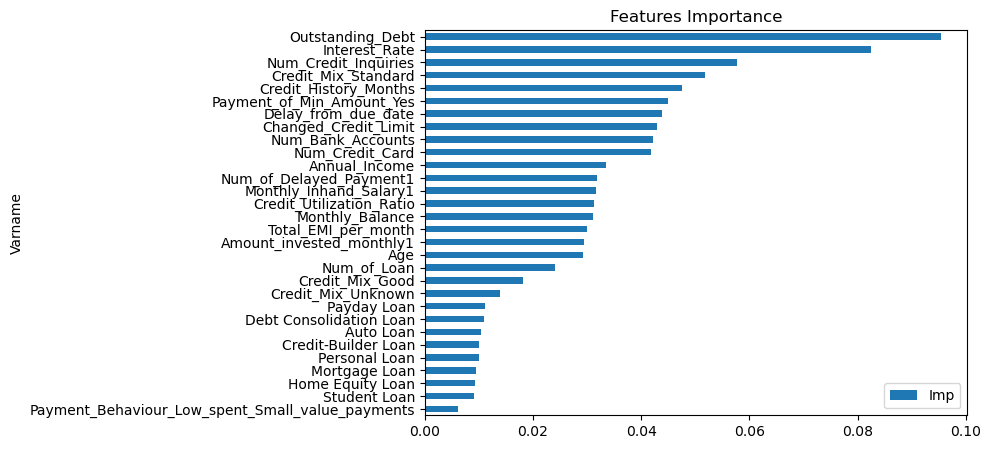

In [116]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_smt.feature_importances_
})
imp_df=imp_df.set_index("Varname")
ax = imp_df.sort_values('Imp',ascending=True).tail(30).plot(kind='barh', title='Features Importance', figsize=(7,5))
ax.set_ylabel("Varname")
plt.show()


In [117]:
test_data = pd.read_csv("/kaggle/input/creditscoring/test.csv")

In [118]:
test_data.info()
test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

(50000, 27)

In [119]:
test_data.isnull().sum()/test_data.shape[0]

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.10030
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.14996
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.06996
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.02070
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.08940
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04542
Payment_Behaviour           0.00000
Monthly_Balance             0.01124
dtype: float64

In [120]:
test_data1=test_data.drop(["ID","Name","SSN"],1)

In [121]:
test_data1=test_data1.drop_duplicates()

In [122]:
test_data1.shape

(50000, 24)

In [123]:
test_data1.isnull().sum()


Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

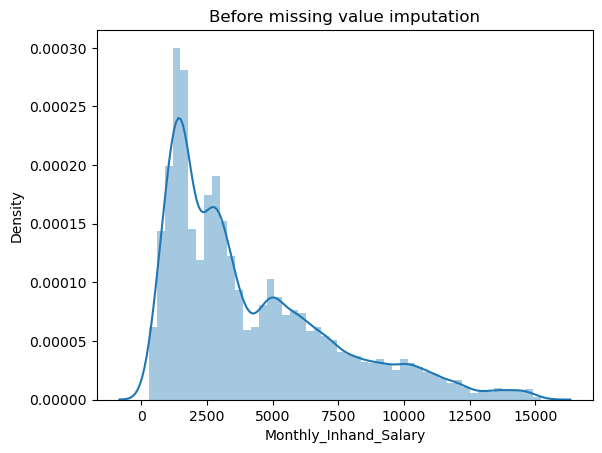

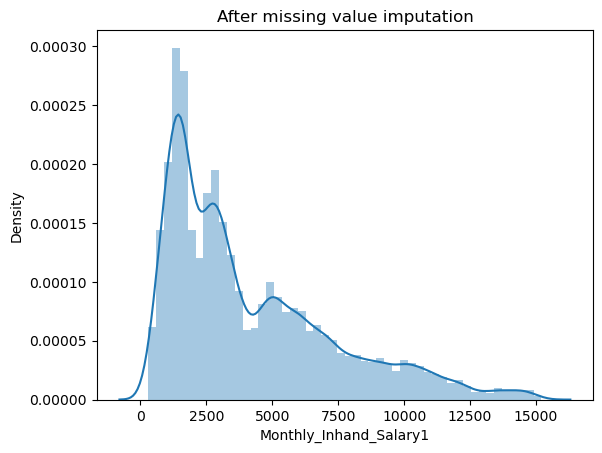

In [124]:
#Monnthly inhand salary
## forwardfill

test_data1["Monthly_Inhand_Salary1"] = test_data1["Monthly_Inhand_Salary"].fillna(method='ffill')
sns.distplot(test_data1["Monthly_Inhand_Salary"])
plt.title("Before missing value imputation")
plt.show()
sns.distplot(test_data1["Monthly_Inhand_Salary1"])
plt.title("After missing value imputation")
plt.show()
test_data1["Monthly_Inhand_Salary1"].isnull().sum()
test_data1["Monthly_Inhand_Salary1"]=test_data1["Monthly_Inhand_Salary1"].astype(float)
test_data1=test_data1.drop("Monthly_Inhand_Salary",1)

In [125]:
#Num_Credit_Enquiries
test_data1["Num_Credit_Inquiries"]=test_data1["Num_Credit_Inquiries"].fillna(0)
test_data1["Num_Credit_Inquiries"]=test_data1["Num_Credit_Inquiries"].astype(float)
# test_data1=test_data1.drop("Num_Credit_Enquiries",1)
# test_data1.Num_Credit_Inquiries.describe()

In [126]:
# Num_of_Delayed_Payment
test_data1["Num_of_Delayed_Payment"].isna().sum()
test_data1["Num_of_Delayed_Payment1"] = test_data1["Num_of_Delayed_Payment"].str.replace("_","0")

test_data1["Num_of_Delayed_Payment1"]= test_data1["Num_of_Delayed_Payment1"].fillna("0")
test_data1["Num_of_Delayed_Payment1"]=test_data1["Num_of_Delayed_Payment1"].astype(float)
test_data1=test_data1.drop("Num_of_Delayed_Payment",1)
# test_data1.Num_of_Delayed_Payment.value_counts()
# test_data1.Num_of_Delayed_Payment1.describe()

In [127]:

test_data1["Credit_History_Age"]=test_data1["Credit_History_Age"].fillna("0 Years and 0 Months")
test_data1[["Year","G1","G2","Month","G3"]]=test_data1["Credit_History_Age"].str.split(" ",expand=True)
# test_data1[["Year","G1","G2","Month","G3"]]
test_data1["Month"]=test_data1["Month"].replace(np.nan,"0").astype(float)
test_data1["Year"]=test_data1["Year"].replace(np.nan,"0").astype(float)
# test_data1[["Year","G1","G2","Month","G3"]]

test_data1["Credit_History_Months"]=test_data1["Month"]+(test_data1["Year"]*12)
test_data1[["Year","G1","G2","Month","G3","Credit_History_Months"]]
test_data1.drop(["Year","Month","G1","G2","G3"],1,inplace=True)
test_data1["Credit_History_Months"]=test_data1["Credit_History_Months"].fillna(0)
test_data1["Credit_History_Months"]=test_data1["Credit_History_Months"].astype(int)
# test_data1["Credit_History_Age"]

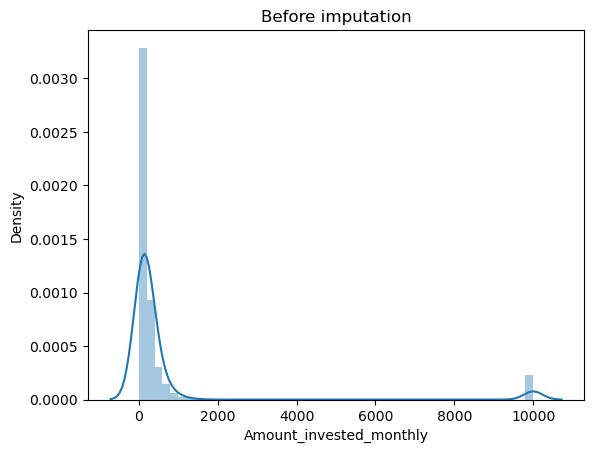

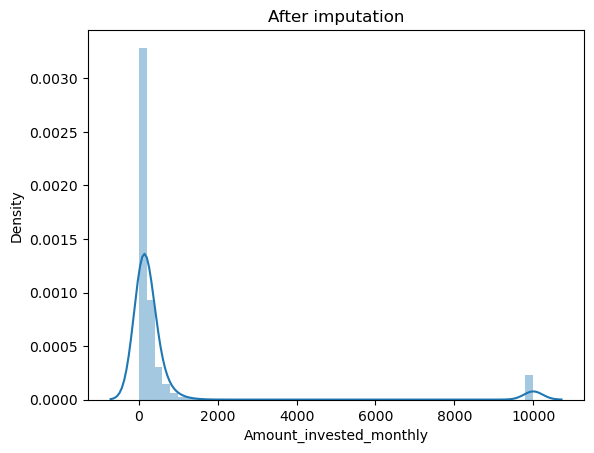

In [128]:
# Amount_invested_monthly
test_data1["Amount_invested_monthly"] = test_data1["Amount_invested_monthly"].str.replace("_","")
# (data["Amount_invested_monthly"].isna().sum())/data.shape[0]
sns.distplot(test_data1["Amount_invested_monthly"])
plt.title("Before imputation")
plt.show()
test_data1["Amount_invested_monthly1"] = test_data1["Amount_invested_monthly"].replace(np.nan,0)
sns.distplot(test_data1["Amount_invested_monthly"])
plt.title("After imputation")
plt.show()
test_data1["Amount_invested_monthly1"]=test_data1["Amount_invested_monthly1"].astype(float)



# 

In [129]:
# Monthly_Balance
print((test_data1["Monthly_Balance"].isna().sum())/test_data1.shape[0])
## only 1% data is there; lets look into the data
test_data1[test_data1["Monthly_Balance"].isna()]
test_data1["Monthly_Balance"] = test_data1["Monthly_Balance"].replace(np.nan,0)
print((test_data1["Monthly_Balance"].isna().sum())/test_data1.shape[0])
test_data1["Monthly_Balance"] = test_data1["Monthly_Balance"].str.replace("_","")

test_data1["Monthly_Balance"]=test_data1["Monthly_Balance"].astype(float)
# test_data1["Monthly_Balance"].describe()

0.01124
0.0


In [130]:
test_data1["Type_of_Loan"]=test_data1["Type_of_Loan"].fillna(test_data1["Type_of_Loan"].mode())
test_data1["Type_of_Loan"].value_counts().head(10)

for i in test_data1['Type_of_Loan'].value_counts().head(9).index[1:] : 
    test_data1[i] = test_data1['Type_of_Loan'].str.contains(i)

# Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan


In [131]:
test_data1.isnull().sum()
test_data1=test_data1.drop(["Type_of_Loan","Amount_invested_monthly","Credit_History_Age"],1)

In [132]:
test_data1=test_data1.fillna(0)

In [133]:
test_data1.isnull().sum()
test_data1.info()
ln=["Credit-Builder Loan","Personal Loan","Debt Consolidation Loan","Student Loan","Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan"]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Num_Bank_Accounts         50000 non-null  int64  
 5   Num_Credit_Card           50000 non-null  int64  
 6   Interest_Rate             50000 non-null  int64  
 7   Num_of_Loan               50000 non-null  object 
 8   Delay_from_due_date       50000 non-null  int64  
 9   Changed_Credit_Limit      50000 non-null  object 
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Credit_Mix                50000 non-null  object 
 12  Outstanding_Debt          50000 non-null  object 
 13  Credit_Utilization_Ratio  50000 non-null  float64
 14  Paymen

In [134]:
test_data1[ln]=test_data1[ln].astype(float)

In [135]:
test_data1.Payment_of_Min_Amount.value_counts()

Yes    26158
No     17849
NM      5993
Name: Payment_of_Min_Amount, dtype: int64

In [136]:
obj=[]
num=[]
for i in test_data1.columns:
    if test_data1[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if test_data1[i].dtype=="category":
        obj.append(i)
    if test_data1[i].dtype =="float64":
        num.append(i)
    if test_data1[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1', 'Credit_History_Months', 'Amount_invested_monthly1', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'] 

Object columns:  ['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [137]:
obj.remove("Customer_ID")


In [138]:
obj

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [139]:
# test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]]=test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]].str.replace("_","")

# test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]]=test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]].astype(int)
test_data1["Annual_Income"]=test_data1["Annual_Income"].str.replace("_","0")
test_data1["Annual_Income"]=test_data1["Annual_Income"].fillna(0)
test_data1["Annual_Income"]=test_data1["Annual_Income"].astype(float)

In [140]:
# test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]]=test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]].str.replace("_","")

# test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]]=test_data1[["Num_of_Delayed_Payment1","Num_of_Loan"]].astype(int)
test_data1["Num_of_Loan"]=test_data1["Num_of_Loan"].str.replace("_","0")
test_data1["Num_of_Loan"]=test_data1["Num_of_Loan"].fillna(0)
test_data1["Num_of_Loan"]=test_data1["Num_of_Loan"].astype(int)

In [141]:
test_data1["Changed_Credit_Limit"]=test_data1["Changed_Credit_Limit"].str.replace("_","0")
test_data1["Changed_Credit_Limit"]=test_data1["Changed_Credit_Limit"].fillna(0)
test_data1["Changed_Credit_Limit"]=test_data1["Changed_Credit_Limit"].astype(float)
test_data1["Outstanding_Debt"]=test_data1["Outstanding_Debt"].str.replace("_","0")
test_data1["Outstanding_Debt"]=test_data1["Outstanding_Debt"].astype(float)
test_data1.isnull().sum()


Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Monthly_Inhand_Salary1      0
Num_of_Delayed_Payment1     0
Credit_History_Months       0
Amount_invested_monthly1    0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

In [142]:
test_data1["Age"]=test_data1["Age"].str.replace("_","0")

test_data1["Age"]=test_data1["Age"].astype(int)


In [143]:
obj=[]
num=[]
for i in test_data1.columns:
    if test_data1[i].dtype =="object" and i!="Credit_Score" :
        obj.append(i)
    if test_data1[i].dtype=="category":
        obj.append(i)
    if test_data1[i].dtype =="float64":
        num.append(i)
    if test_data1[i].dtype =="int64":
        num.append(i)
print("Numeric columns: ",num,"\n")
print("Object columns: "  , obj)


Numeric columns:  ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Monthly_Balance', 'Monthly_Inhand_Salary1', 'Num_of_Delayed_Payment1', 'Credit_History_Months', 'Amount_invested_monthly1', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'] 

Object columns:  ['Customer_ID', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [144]:

for i in test_data1[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']].columns:
    print(test_data1[i].value_counts())

    
test_data1["Credit_History_Months"].describe()


_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64
Standard    18379
Good        12260
_            9805
Bad          9556
Name: Credit_Mix, dtype: int64
Yes    26158
No     17849
NM      5993
Name: Payment_of_Min_Amount, dtype: int64
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: Payment_Behaviour, dtype: int64


count    50000.000000
mean       206.934920
std        115.018394
min          0.000000
25%        121.000000
50%        215.000000
75%        298.000000
max        408.000000
Name: Credit_History_Months, dtype: float64

In [145]:
# data.head()
test_data1.loc[test_data1["Payment_Behaviour"].str.contains("9#%"),"Payment_Behaviour"]="Unknown"
test_data1.loc[test_data1["Credit_Mix"].str.contains("_"),"Credit_Mix"]="Unknown"
test_data1.loc[test_data1["Payment_of_Min_Amount"]=="NM","Payment_of_Min_Amount"]="No"

In [146]:
## as its a test file , imputing for Occupation wont be possible to lets delete those records
test_data1["Occupation"]=test_data1["Occupation"].replace("_______","Unknown")
test_data2=test_data1

In [147]:
test_data2["Occupation"].value_counts()

Unknown          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64

In [148]:

for i in test_data2[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']].columns:
    print(test_data2[i].value_counts())

    

Unknown          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64
Standard    18379
Good        12260
Unknown      9805
Bad          9556
Name: Credit_Mix, dtype: int64
Yes    26158
No     23842
Name: Payment_of_Min_Amount, dtype: int64
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Unknown                              3800
Name: Payment_Behaviour, dtype: int64


In [149]:
test_data2 = pd.get_dummies(test_data2, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], drop_first=True)


In [150]:
test_data2

,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix_Unknown,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_Behaviour_Unknown
0,CUS_0xd40,23,19114.12,3,4,3,4,3,11.27,2022.0,...,1,0,0,0,0,0,0,0,1,0
1,CUS_0xd40,24,19114.12,3,4,3,4,3,13.27,4.0,...,1,0,0,0,1,0,0,0,0,0
2,CUS_0xd40,24,19114.12,3,4,3,4,-1,12.27,4.0,...,1,0,0,0,0,0,0,1,0,0
3,CUS_0xd40,240,19114.12,3,4,3,4,4,11.27,4.0,...,1,0,0,0,1,0,0,0,0,0
4,CUS_0x21b1,28,34847.84,2,4,6,1,3,5.42,5.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CUS_0x8600,4975,20002.88,10,8,29,5,33,18.31,12.0,...,0,0,1,1,0,0,0,0,1,0
49996,CUS_0x942c,25,39628.99,4,6,7,20,20,11.50,7.0,...,1,0,0,0,0,0,0,0,1,0
49997,CUS_0x942c,25,39628.99,4,6,7,2,23,13.50,7.0,...,1,0,0,0,0,0,1,0,0,0
49998,CUS_0x942c,25,39628.99,4,6,7,20,21,11.50,7.0,...,1,0,0,0,0,1,0,0,0,0


In [151]:
test_data3=test_data2.drop("Customer_ID",1)


In [152]:
test_data3.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 50000 non-null  int64  
 1   Annual_Income                                       50000 non-null  float64
 2   Num_Bank_Accounts                                   50000 non-null  int64  
 3   Num_Credit_Card                                     50000 non-null  int64  
 4   Interest_Rate                                       50000 non-null  int64  
 5   Num_of_Loan                                         50000 non-null  int64  
 6   Delay_from_due_date                                 50000 non-null  int64  
 7   Changed_Credit_Limit                                50000 non-null  float64
 8   Num_Credit_Inquiries                                50000 non-null  float64


In [153]:
y_pred_smt = rf_us.predict(test_data3)



In [154]:
test_data2["CREDIT_SCORE"]=y_pred_smt


In [155]:
# test_data2["Pred_Credit_Score"].value_counts()
# print(pd.Series(y_pred_rf2).value_counts()/len(y_pred_rf2))
print(pd.Series(y_train).value_counts()/len(y_train))

print(test_data2["CREDIT_SCORE"].value_counts()/test_data.shape[0])

2    0.532786
1    0.288500
0    0.178714
Name: Credit_Score, dtype: float64
2    0.59284
1    0.28044
0    0.12672
Name: CREDIT_SCORE, dtype: float64


In [156]:
Customer_level_scores = pd.DataFrame(test_data2.groupby(["Customer_ID"])["CREDIT_SCORE"].agg(["mean"]).reset_index())
# Customer_level_scores.Pred_Credit_Score=Customer_level_scores.Pred_Credit_Score.astype(str)
# Customer_level_scores.groupby(["mean"])["Customer_ID"].count()
Customer_level_scores["CREDIT_SCORE"]=Customer_level_scores["mean"].apply(lambda x: 0 if x <0.5 else (1 if x<1.5 else 2))
# lambda x: x*10 if x<2 else (x**2 if x<4 else x+10)


In [157]:
Customer_level_scores.groupby("CREDIT_SCORE")["Customer_ID"].count()/Customer_level_scores.shape[0]


CREDIT_SCORE
0    0.06968
1    0.34192
2    0.58840
Name: Customer_ID, dtype: float64

In [158]:
print(test_data2.groupby("CREDIT_SCORE")["Outstanding_Debt","Interest_Rate","Credit_Mix_Standard","Num_Credit_Inquiries","Credit_History_Months"].agg(["median","count"]))
print(data1.groupby("Credit_Score")["Outstanding_Debt","Interest_Rate","Credit_Mix_Standard","Num_Credit_Inquiries","Credit_History_Months"].agg(["median","count"]))

             Outstanding_Debt        Interest_Rate        Credit_Mix_Standard  \
                       median  count        median  count              median   
CREDIT_SCORE                                                                    
0                      712.03   6336           7.0   6336                 0.0   
1                     2274.10  14022          24.0  14022                 0.0   
2                      864.67  29642          11.0  29642                 0.0   

                    Num_Credit_Inquiries        Credit_History_Months         
              count               median  count                median  count  
CREDIT_SCORE                                                                  
0              6336                  4.0   6336                 284.0   6336  
1             14022                 11.0  14022                 136.0  14022  
2             29642                  6.0  29642                 240.0  29642  
             Outstanding_Debt        In

In [159]:
Customer_level_scores.drop("mean",1,inplace=True)

In [160]:
test_data_model_pred=pd.merge(test_data1,Customer_level_scores,on="Customer_ID",how="inner")



In [161]:
## mean based logic is pending like mean 0.5,then 1(Poor bucket) 1.5 then 2(Standard Bucket).
test_data_model_pred["CREDIT_SCORE"]=test_data_model_pred["CREDIT_SCORE"].replace({0:"Good",1:"Poor",2:"Standard"})

<AxesSubplot:ylabel='Customer_ID'>

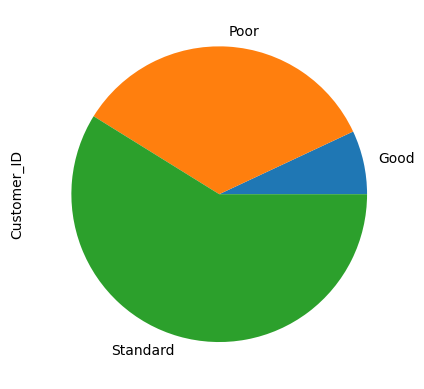

In [162]:
test_data_model_pred.groupby("CREDIT_SCORE")["Customer_ID"].count().plot.pie()